In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [2]:
df_merge = pd.read_csv('../Data/analysis_files/df_merged.csv')

In [3]:
df_merge.head()

Unnamed: 0         tool  threshold strain  nTP  nFP  nTN  n_true  nFN  \
0           0    BioGraph*         10  AKR_J   36  389  206     504  468   
1           1    BioGraph*        100  AKR_J  249  176  289     504  255   
2           2    BioGraph*       1000  AKR_J  269  156  299     504  235   
3           3    BioGraph*      10000  AKR_J  291  134  347     504  213   
4           4  breakdancer         10  AKR_J    9  527  253     504  495   

   sensitivity  precision  specificity   f-score  
0     0.071429   0.084706     0.346218  0.077503  
1     0.494048   0.585882     0.621505  0.536060  
2     0.533730   0.632941     0.657143  0.579117  
3     0.577381   0.684706     0.721414  0.626480  
4     0.017857   0.016791     0.324359  0.017308

In [4]:
data = df_merge.loc[df_merge['threshold'] == 100]

In [5]:
data.head()

Unnamed: 0         tool  threshold strain  nTP   nFP   nTN  n_true  nFN  \
1            1    BioGraph*        100  AKR_J  249   176   289     504  255   
5            5  breakdancer        100  AKR_J  254   282   314     504  250   
9            9       clever        100  AKR_J  336  9269    53     504  168   
12          12        crest        100  AKR_J   67   159  1007     504  437   
16          16        delly        100  AKR_J  311   612   188     504  193   

    sensitivity  precision  specificity   f-score  
1      0.494048   0.585882     0.621505  0.536060  
5      0.503968   0.473881     0.526846  0.488462  
9      0.666667   0.034982     0.005685  0.066475  
12     0.132937   0.296460     0.863636  0.183562  
16     0.617063   0.336945     0.235000  0.435879

In [7]:
tool=['clever','gridss','delly','smoove','pindel','breakdancer','BioGraph*','popdel','rdxplorer','mistrvar','gasv','indelminer','crest','genomestrip','manta_candidateSV']


In [8]:
spec=[]
spec=np.array(spec)
for t in tool:
    data1=data.loc[data['tool']==t]
    spec=np.append(spec, (data1['specificity'].max()-data1['specificity'].min()))
print(np.mean(spec)  )  

0.0883557923396258


In [9]:
spec=[]
spec=np.array(spec)
for t in tool:
    data1=data.loc[data['tool']==t]
    spec=np.append(spec,(data1['sensitivity'].max()-data1['sensitivity'].min()))
print(np.mean(spec)  )  

print(spec)

0.05486066710448058
[0.03975535 0.0204931  0.03081667 0.02572799 0.05531766 0.09992658
 0.06382483 0.05048575 0.13570402 0.05433132 0.04084728 0.06264834
 0.07719482 0.04438017 0.02145611]


In [10]:
spec=[]
spec=np.array(spec)
for t in tool:
    data1=data.loc[data['tool']==t]
    spec=np.append(spec,(data1['precision'].max()-data1['precision'].min()))
print(np.mean(spec)  )  
print(spec)

0.08645733567632499
[0.63730286 0.01727854 0.03633615 0.06582356 0.00072405 0.12483709
 0.04691971 0.04393199 0.03231999 0.00493515 0.00467194 0.00239717
 0.15244684 0.12037668 0.0065583 ]


In [11]:
spec=[]
spec=np.array(spec)
for t in tool:
    data1=data.loc[data['tool']==t]
    spec=np.append(spec,(data1['f-score'].max()-data1['f-score'].min()))
print(np.mean(spec)  )  

0.0748320733957061


In [12]:
strain=['AKR_J','A_J','BALB_CJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']

In [13]:
df_sum1 = pd.read_csv('../Data/analysis_files/df_sum')

# S1

In [14]:
df_sum1.head()

Unnamed: 0         tool  threshold   nTP   nFP   nFN   nTN
0           0    BioGraph*         10   297  2878  3502  1672
1           1    BioGraph*        100  1827  1348  1972  2249
2           2    BioGraph*       1000  2004  1171  1795  2331
3           3    BioGraph*      10000  2163  1012  1636  2717
4           4  breakdancer         10    58  3484  3741  2026

In [79]:
# df_sum1["Tool"] = df_sum1["tool"].map(dict(zip(fig_order, labels)))

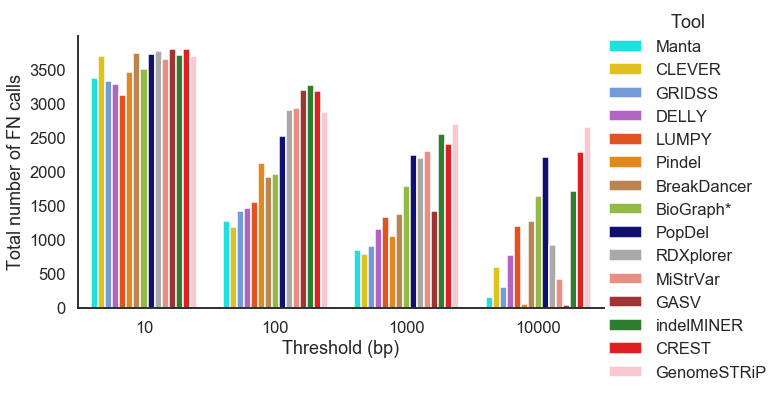

In [16]:
#tool order arranged based on 100 bp threshold (increasing)

%store -r
figs1a=sns.set_style("white")
figs1a=sns.set_context("talk")

fig_order=['manta_candidateSV','clever','gridss','delly','smoove','pindel','breakdancer','BioGraph*','popdel','rdxplorer','mistrvar','gasv','indelminer','crest','genomestrip',]
labels   =['Manta','CLEVER','GRIDSS','DELLY','LUMPY','Pindel','BreakDancer','BioGraph*','PopDel','RDXplorer','MiStrVar','GASV','indelMINER','CREST','GenomeSTRiP']
df_sum1["Tool"] = df_sum1["tool"].map(dict(zip(fig_order, labels)))
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1a = sns.catplot(x="threshold", y="nFN", kind="bar",data = df_sum1,hue="Tool",aspect=1.8, palette=pal,hue_order=labels)
figs1a.set(xlabel='Threshold (bp)', ylabel='Total number of FN calls')
figs1a=sns.despine()
plt.xticks(rotation=0)
#plt.show(figs1a)
plt.savefig("../figures/supplementary/mouse/bar/FN.png")
plt.savefig("../figures/supplementary/mouse/bar/FN.pdf", bbox_inches='tight')

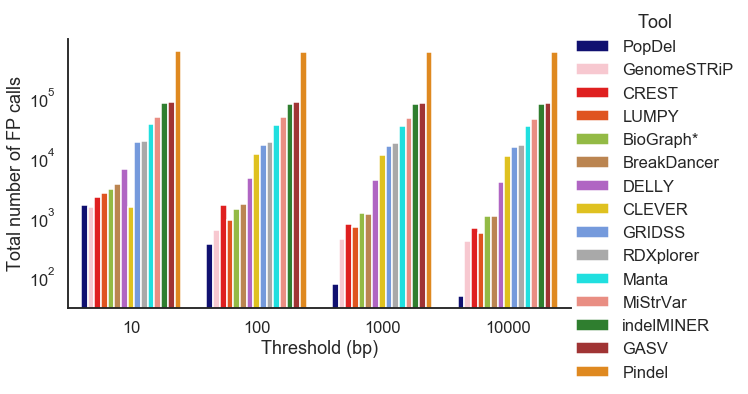

In [19]:
figs1b=sns.set_style("white")
figs1b=sns.set_context("talk")

fig_order = ['popdel','genomestrip','crest','smoove','BioGraph*','breakdancer','delly','clever','gridss','rdxplorer','manta_candidateSV','mistrvar','indelminer','gasv','pindel']
labels =    ['PopDel','GenomeSTRiP','CREST','LUMPY','BioGraph*','BreakDancer','DELLY','CLEVER','GRIDSS','RDXplorer','Manta','MiStrVar','indelMINER','GASV','Pindel']
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1b = sns.catplot(x="threshold", y="nFP", kind="bar",data = df_sum1,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
figs1b.set(xlabel='Threshold (bp)', ylabel='Total number of FP calls')
figs1b.set(yscale="log");
figs1b=sns.despine()
#plt.show(figs1b)
plt.savefig("../figures/supplementary/mouse/bar/FP.png")
plt.savefig("../figures/supplementary/mouse/bar/FP.pdf", bbox_inches='tight')

# S2 - F-score

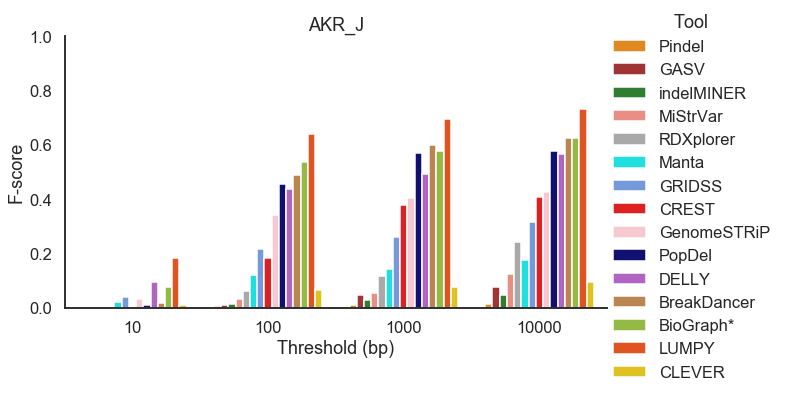

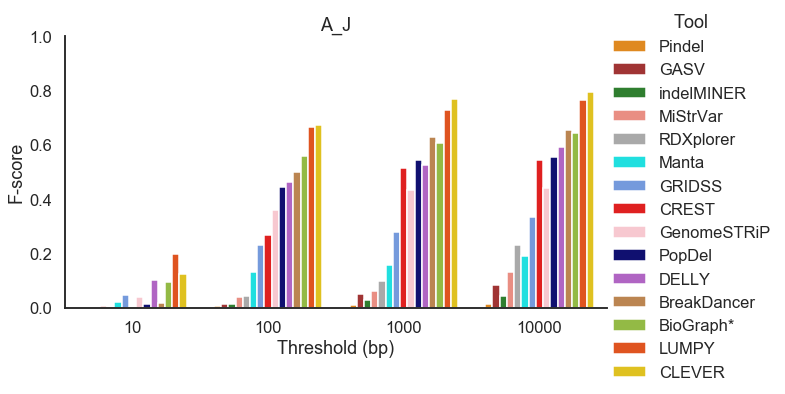

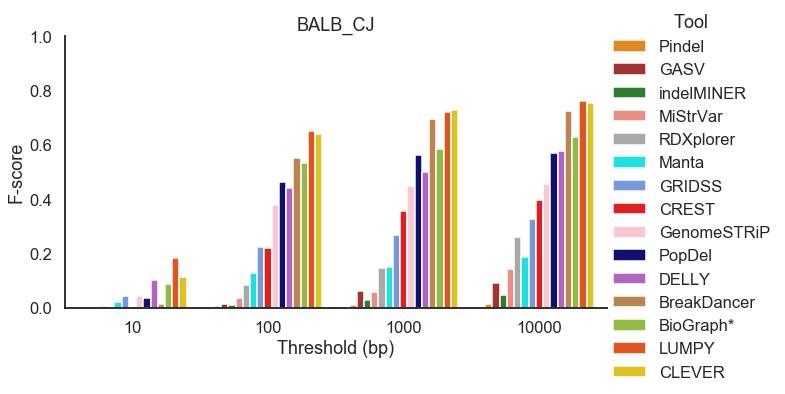

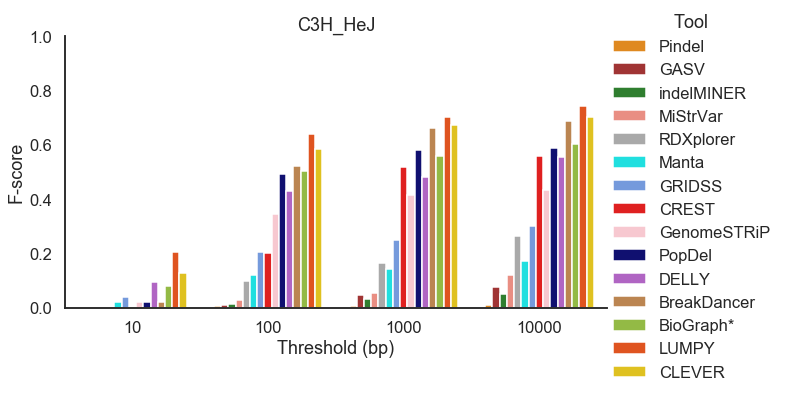

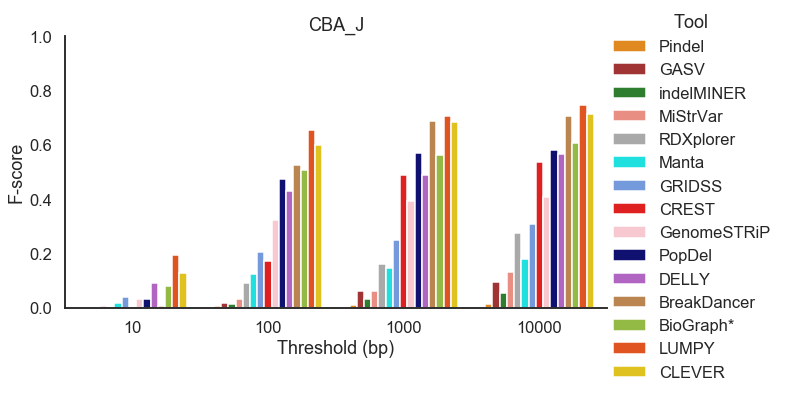

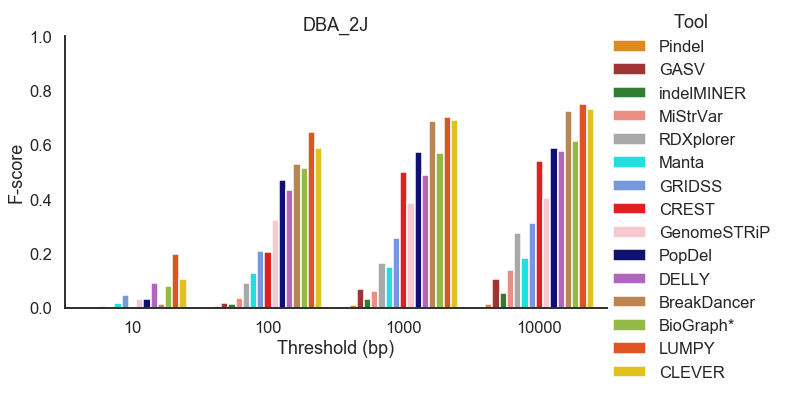

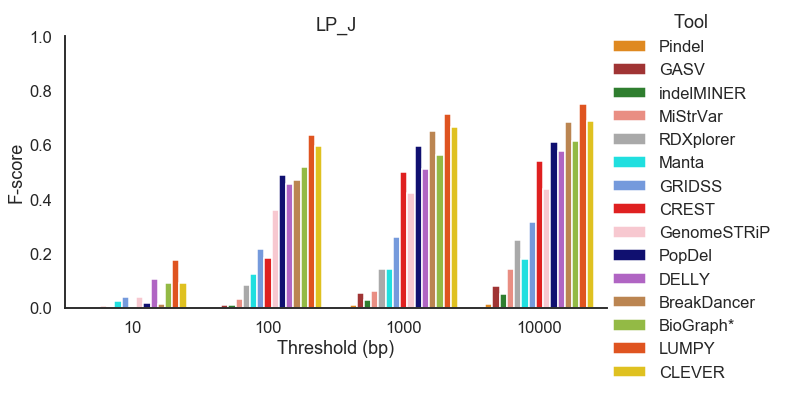

In [23]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['pindel','gasv','indelminer','mistrvar','rdxplorer','manta_candidateSV','gridss','crest','genomestrip','popdel','delly','breakdancer','BioGraph*','smoove','clever']
    labels   = ['Pindel','GASV','indelMINER','MiStrVar','RDXplorer','Manta','GRIDSS','CREST','GenomeSTRiP','PopDel','DELLY','BreakDancer','BioGraph*','LUMPY','CLEVER']
    df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=labels)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/F-score_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/F-score_"+s+".pdf", bbox_inches='tight')

# S3 - Precision

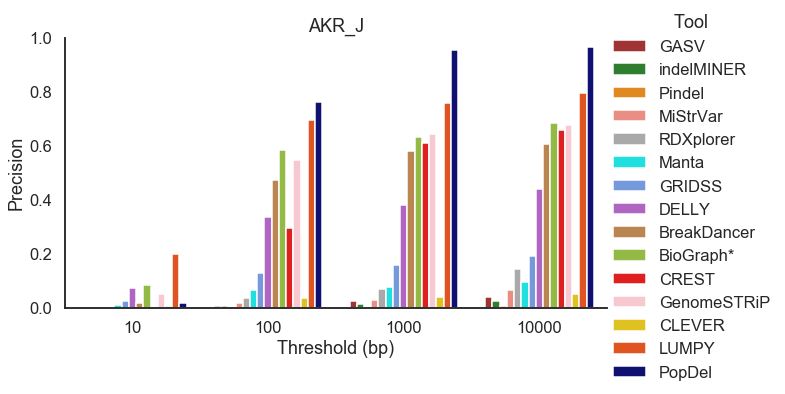

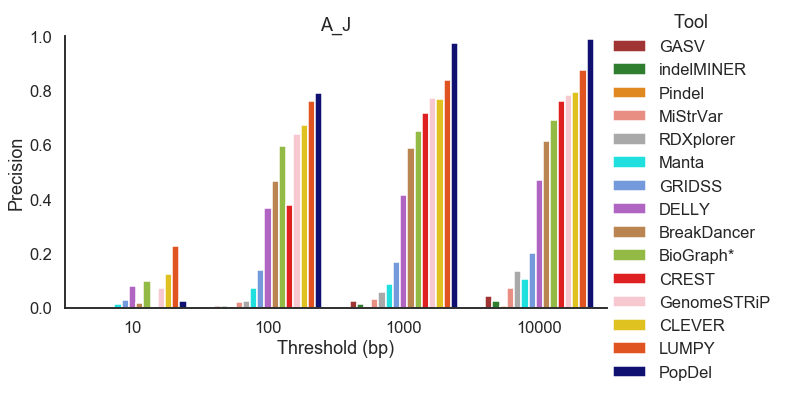

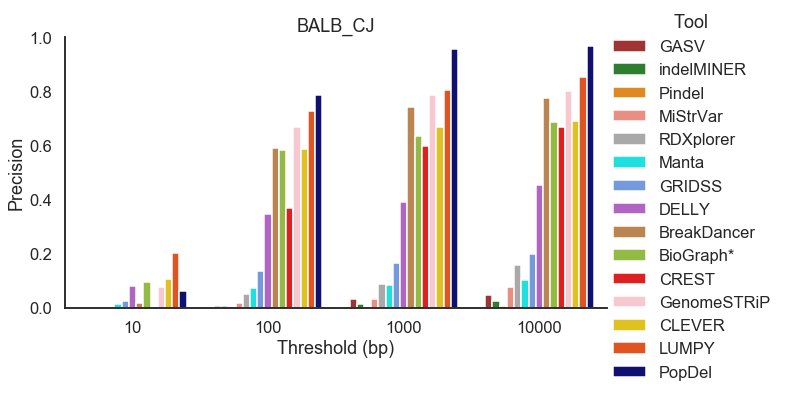

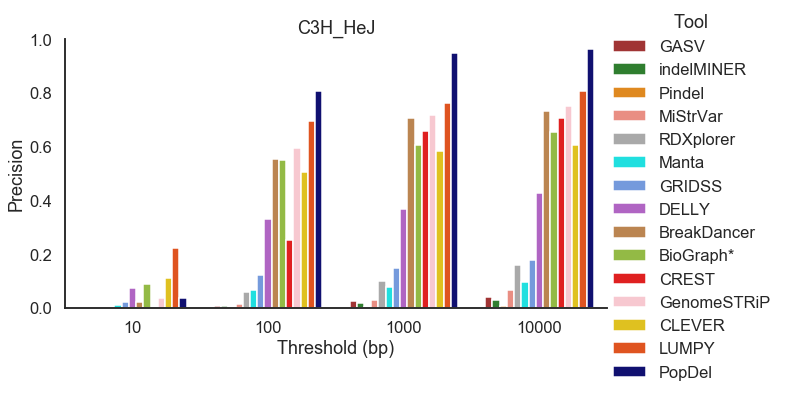

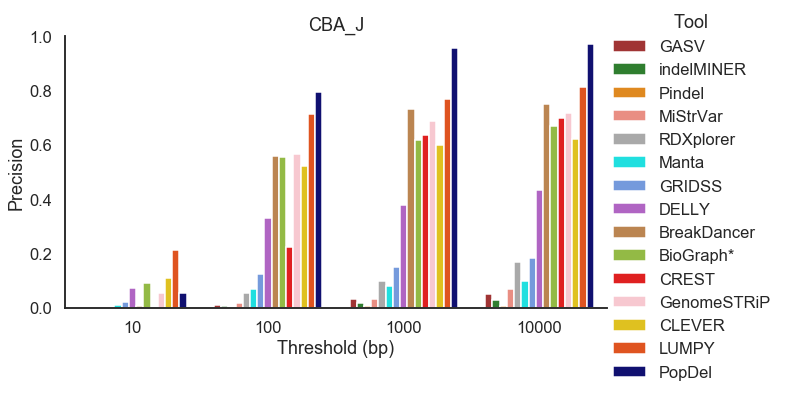

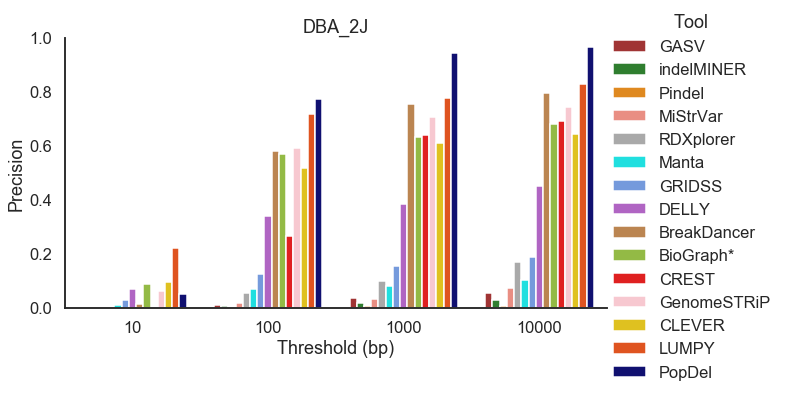

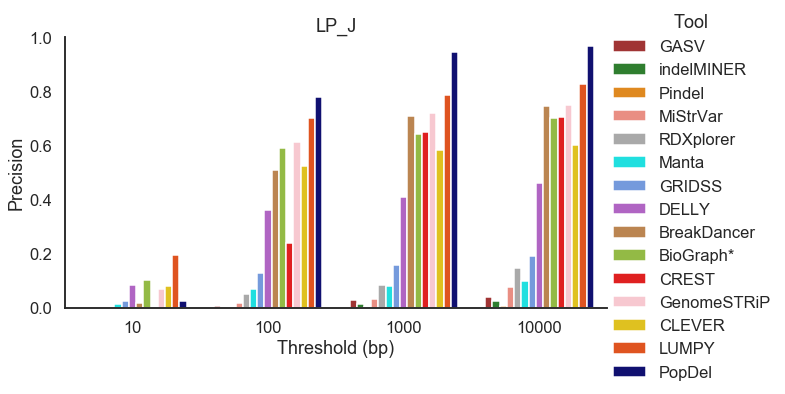

In [26]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['gasv','indelminer','pindel','mistrvar','rdxplorer','manta_candidateSV','gridss','delly','breakdancer','BioGraph*','crest','genomestrip','clever','smoove','popdel']
    fig_order1 = ['GASV','indelMINER','Pindel','MiStrVar','RDXplorer','Manta','GRIDSS','DELLY','BreakDancer','BioGraph*','CREST','GenomeSTRiP','CLEVER','LUMPY','PopDel']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
        
    fig = sns.catplot(x="threshold", y="precision", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=fig_order1)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/precision_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_"+s+".pdf", bbox_inches='tight')

# S4 - Sensitivity

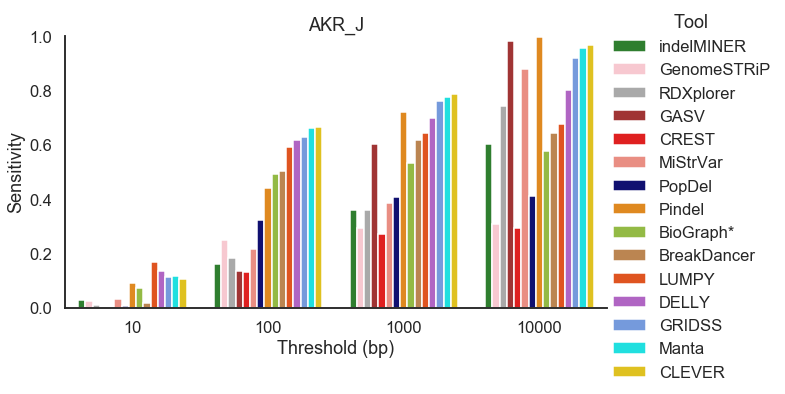

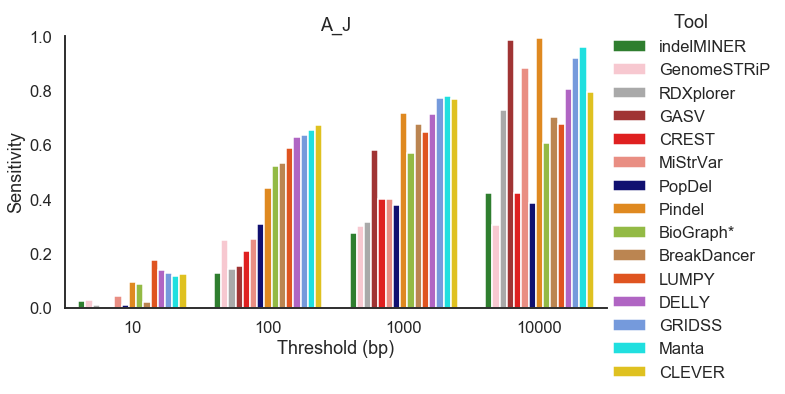

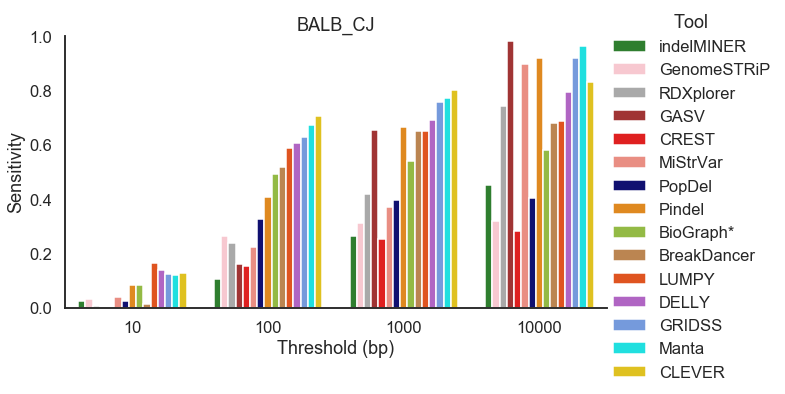

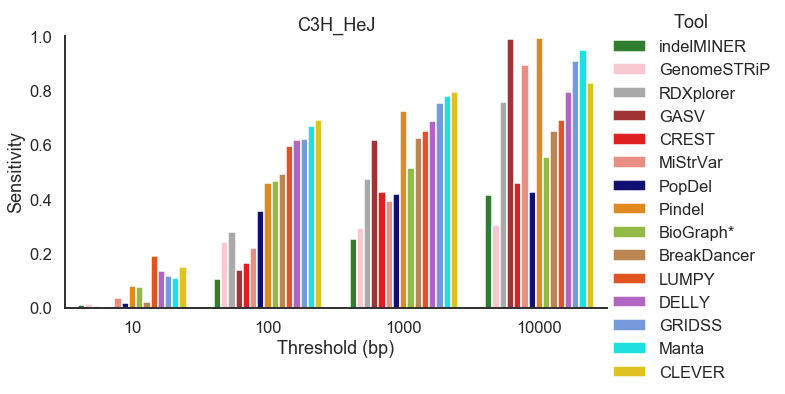

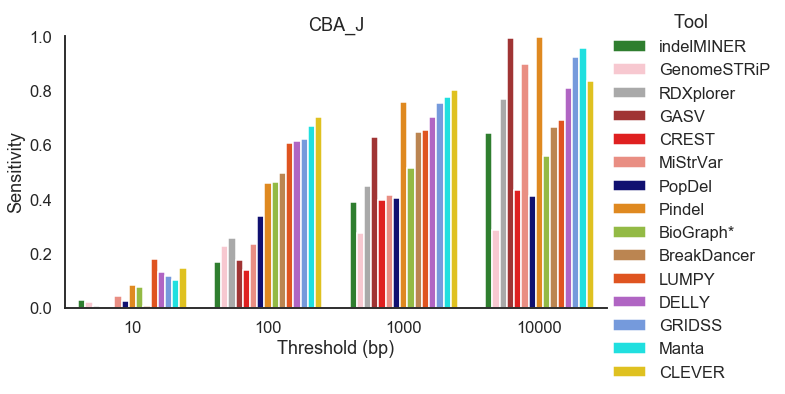

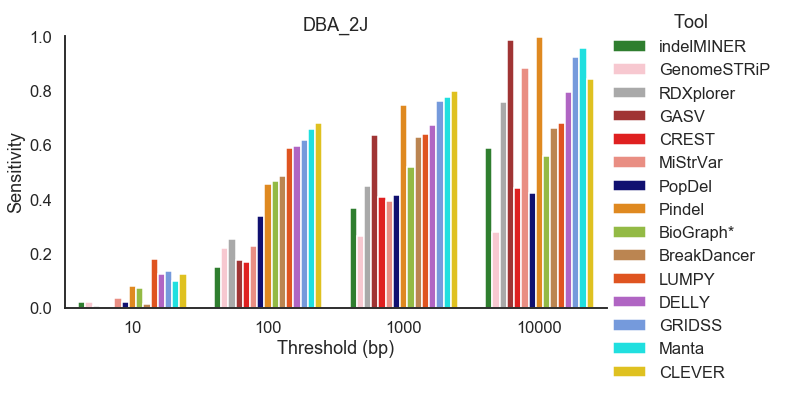

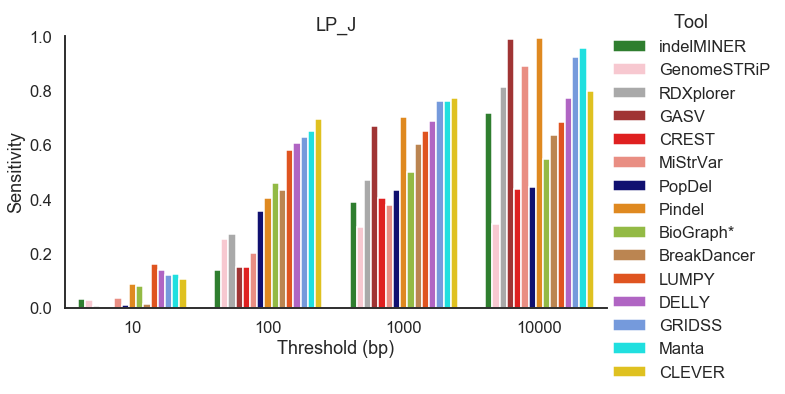

In [28]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['indelminer','genomestrip','rdxplorer','gasv','crest','mistrvar','popdel','pindel','BioGraph*','breakdancer','smoove','delly','gridss','manta_candidateSV','clever']
    fig_order1 = ['indelMINER','GenomeSTRiP','RDXplorer','GASV','CREST','MiStrVar','PopDel','Pindel','BioGraph*','BreakDancer','LUMPY','DELLY','GRIDSS','Manta','CLEVER']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal, hue_order=fig_order1)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity"+s+".pdf", bbox_inches='tight')

# S5 - Specificity

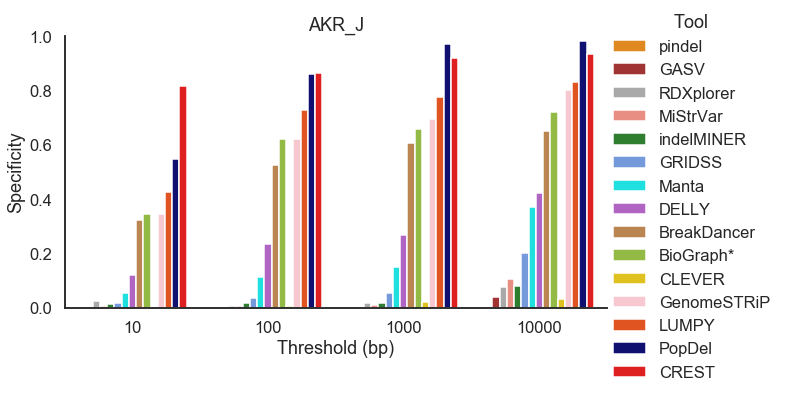

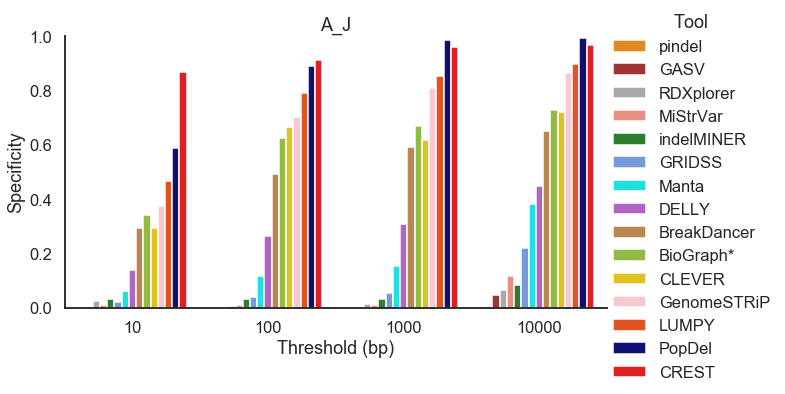

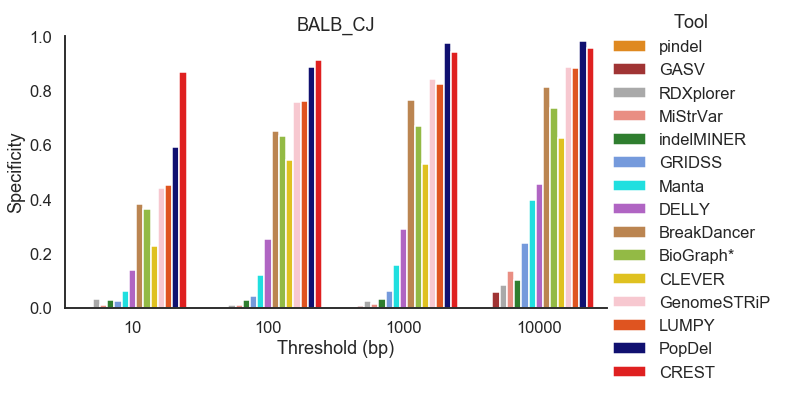

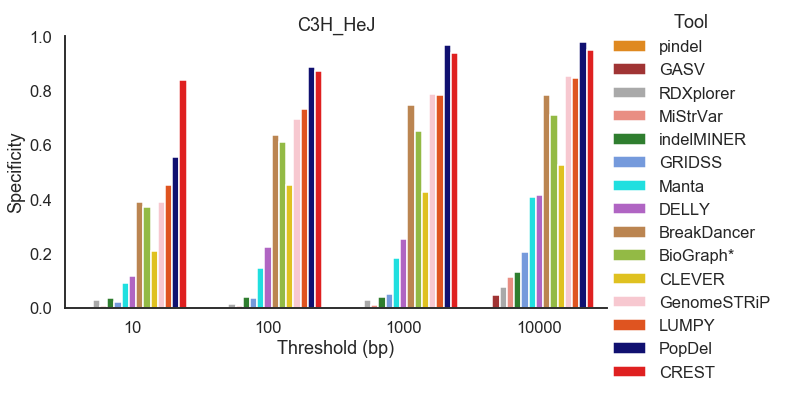

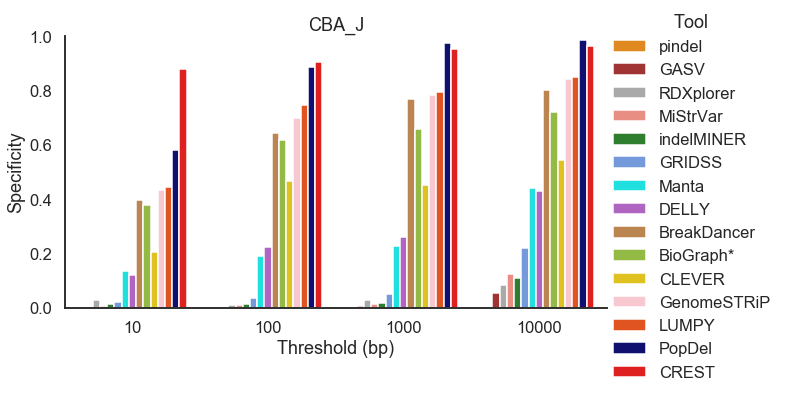

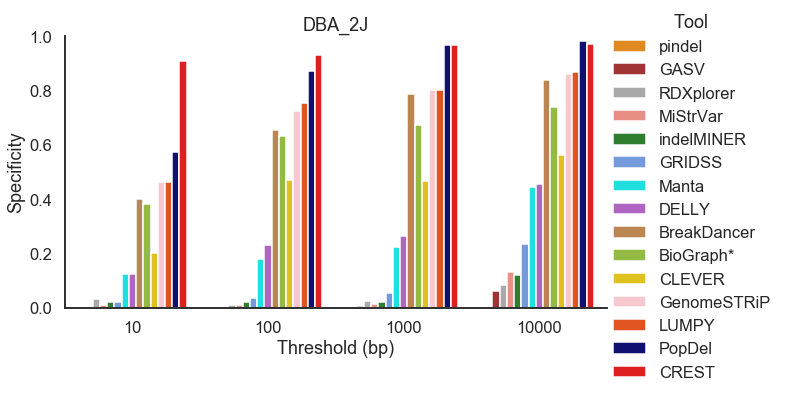

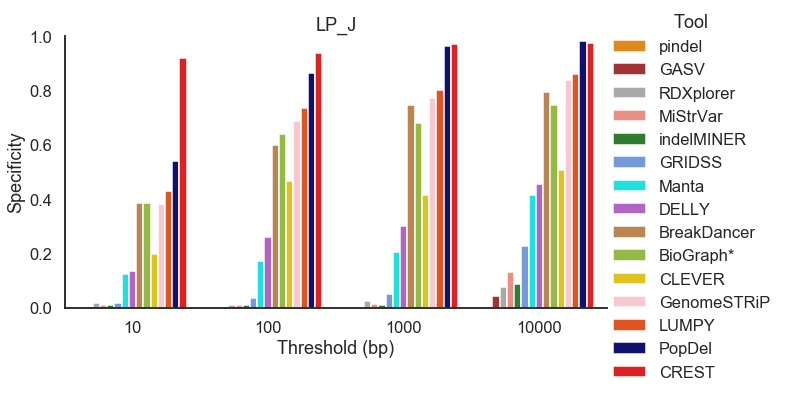

In [32]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['pindel','gasv','rdxplorer','mistrvar','indelminer','gridss','manta_candidateSV','delly','breakdancer','BioGraph*','clever','genomestrip','smoove','popdel','crest']
    fig_order1 = ['pindel','GASV','RDXplorer','MiStrVar','indelMINER','GRIDSS','Manta','DELLY','BreakDancer','BioGraph*','CLEVER','GenomeSTRiP','LUMPY','PopDel','CREST']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=fig_order1)
    plt.title(s)
    plt.ylim(0, 1)
    fig.set(xlabel='Threshold (bp)', ylabel='Specificity')
    fig=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_"+s+".pdf", bbox_inches='tight')
    

# S6 Sensitivity x Precision

In [33]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

tool  threshold  Unnamed: 0         nTP         nFP         nTN  \
0    BioGraph*         10       204.0   42.428571  411.142857  238.857143   
1    BioGraph*        100       205.0  261.000000  192.571429  321.285714   
2    BioGraph*       1000       206.0  286.285714  167.285714  333.000000   
3    BioGraph*      10000       207.0  309.000000  144.571429  388.142857   
4  breakdancer         10       208.0    8.285714  497.714286  289.428571   

       n_true         nFN  sensitivity  precision  specificity   f-score  
0  542.714286  500.285714     0.078281   0.093773     0.367228  0.085301  
1  542.714286  281.714286     0.481218   0.576129     0.625650  0.524250  
2  542.714286  256.428571     0.527502   0.631530     0.665834  0.574669  
3  542.714286  233.714286     0.569452   0.681937     0.728891  0.620445  
4  542.714286  534.428571     0.015434   0.016424     0.368414  0.015859

In [34]:
color_map1 = {'BioGraph*':'yellowgreen', 'BreakDancer':'peru', 'CLEVER':'gold', 'DELLY':'darkorange', 'DELLY':'mediumorchid', 
             'GASV':'firebrick', 'GRIDSS':'cornflowerblue', 'indelMINER':'forestgreen', 
             'MiStrVar':'salmon', 'Pindel':'darkorange', 'PopDel':'navy', 'RDXplorer':'darkgray', 
             'LUMPY':'orangered', 'true deletions':'black', 'CREST':'red', 'GenomeSTRiP':'pink','Manta':'aqua'}

In [35]:
df_mean

tool  threshold  Unnamed: 0         nTP         nFP         nTN  \
0     BioGraph*         10       204.0   42.428571  411.142857  238.857143   
1     BioGraph*        100       205.0  261.000000  192.571429  321.285714   
2     BioGraph*       1000       206.0  286.285714  167.285714  333.000000   
3     BioGraph*      10000       207.0  309.000000  144.571429  388.142857   
4   breakdancer         10       208.0    8.285714  497.714286  289.428571   
..          ...        ...         ...         ...         ...         ...   
63       smoove      10000       265.0  371.571429   77.000000  481.428571   
64     sniffles         10       266.0   54.571429  163.428571  392.000000   
65     sniffles        100       267.0  145.000000   73.000000  409.857143   
66     sniffles       1000       268.0  152.714286   65.285714  413.285714   
67     sniffles      10000       269.0  169.285714   48.714286  437.857143   

        n_true         nFN  sensitivity  precision  specificity   f-score  
0   542.714286  500.285714     0.078281   0.093773     0.367228  0.085301  
1   542.714286  281.714286     0.481218   0.576129     0.625650  0.524250  
2   542.714286  256.428571     0.527502   0.631530     0.665834  0.574669  
3   542.714286  233.714286     0.569452   0.681937     0.728891  0.620445  
4   542.714286  534.428571     0.015434   0.016424     0.368414  0.015859  
..         ...         ...          ...        ...          ...       ...  
63  542.714286  171.142857     0.684529   0.829013     0.862353  0.749660  
64  542.714286  488.142857     0.099502   0.245469     0.707284  0.141093  
65  542.714286  397.714286     0.265188   0.659636     0.849499  0.376783  
66  542.714286  390.000000     0.279380   0.695943     0.864249  0.397079  
67  542.714286  373.428571     0.309843   0.773859     0.900341  0.440625  

[68 rows x 12 columns]

In [36]:
for th in [0,10,100,1000,10000]:
    data=df_mean.loc[df_mean['threshold']== th]
    precision=data['precision']
    specificity=data['specificity']
    print(scipy.stats.spearmanr(precision.values, specificity.values))

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=0.54077263383169, pvalue=0.025000335810808374)
SpearmanrResult(correlation=0.8627450980392157, pvalue=8.317125318327623e-06)
SpearmanrResult(correlation=0.9362745098039217, pvalue=3.2834187890278755e-08)
SpearmanrResult(correlation=0.9338235294117647, pvalue=4.3263269874737686e-08)


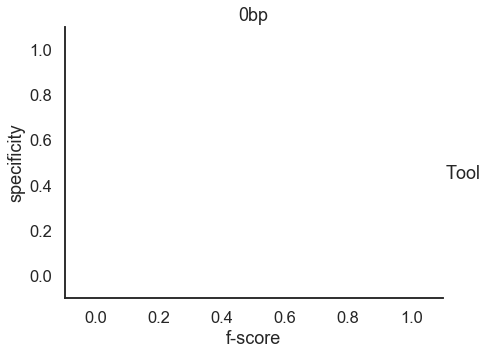

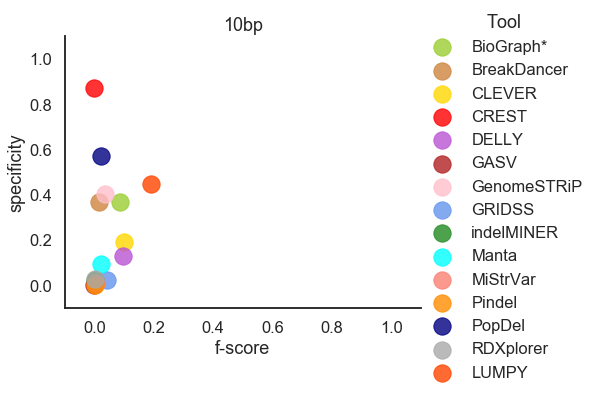

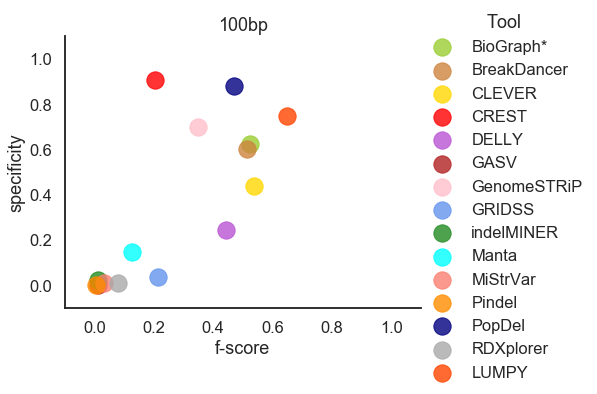

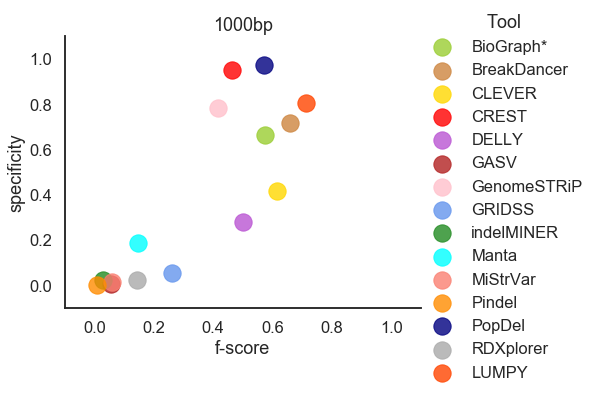

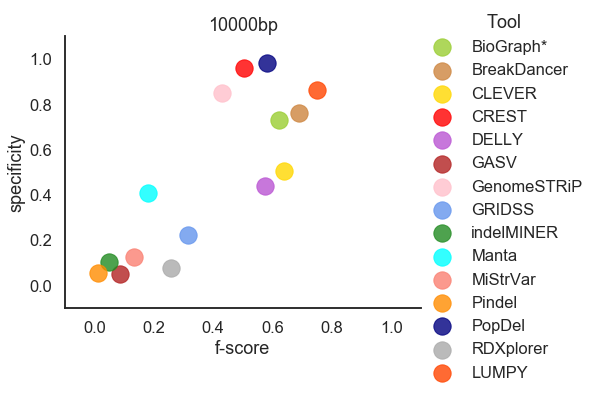

In [37]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['indelminer','rdxplorer','gasv','mistrvar','popdel','pindel','BioGraph*','breakdancer','smoove','delly','gridss','clever','crest','manta_candidateSV','genomestrip']
    labels = ['indelMINER','RDXplorer','GASV','MiStrVar','PopDel','Pindel','BioGraph*','BreakDancer','LUMPY','DELLY','GRIDSS','CLEVER','CREST','Manta','GenomeSTRiP']
    df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='f-score', y='specificity', hue='Tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=color_map1)
    g.set(xlabel='f-score', ylabel='specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1.1)
    g=plt.ylim(-0.1, 1.1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.pdf")

In [38]:
for th in [0,10,100,1000,10000]:
    data=df_mean.loc[df_mean['threshold']== th]
    precision=data['f-score']
    specificity=data['specificity']
    print(scipy.stats.spearmanr(precision.values, specificity.values))

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=0.46474564222723475, pvalue=0.060163967051645735)
SpearmanrResult(correlation=0.6715686274509804, pvalue=0.003155730532110547)
SpearmanrResult(correlation=0.7205882352941178, pvalue=0.0011017357540910224)
SpearmanrResult(correlation=0.7156862745098039, pvalue=0.001235508800786355)


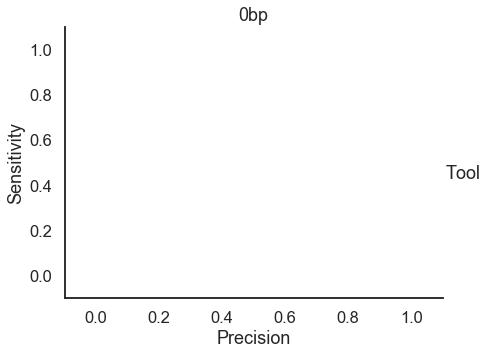

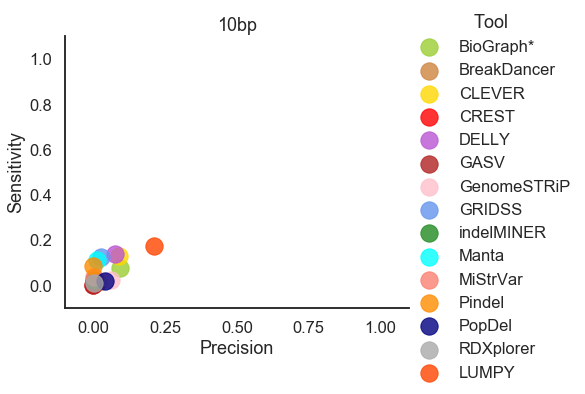

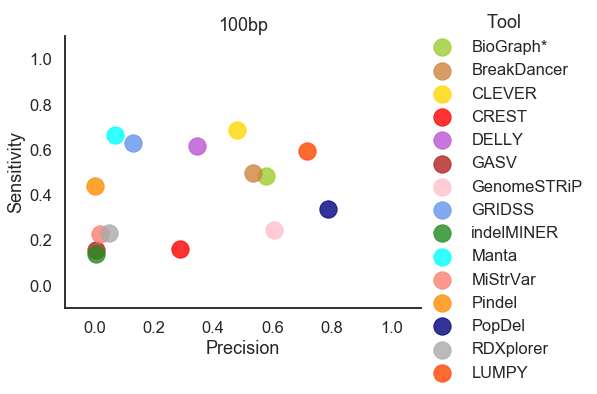

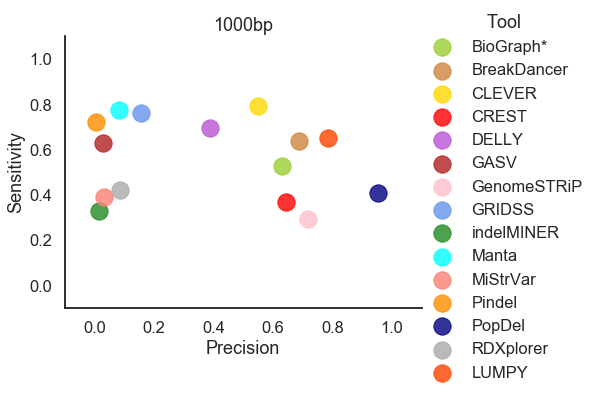

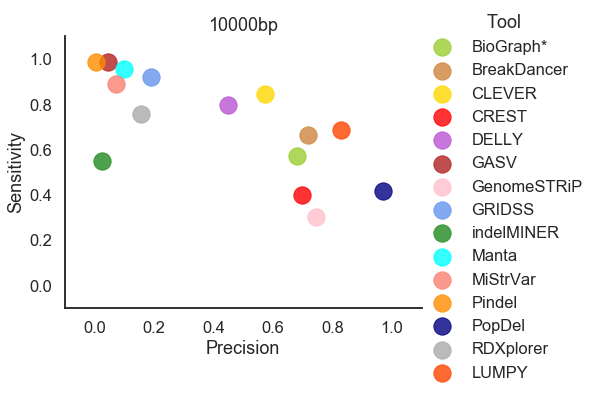

In [39]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['indelminer','rdxplorer','gasv','mistrvar','popdel','pindel','BioGraph*','breakdancer','smoove','delly','gridss','clever','crest','manta_candidateSV','genomestrip']
    labels = ['indelMINER','RDXplorer','GASV','MiStrVar','PopDel','Pindel','BioGraph*','BreakDancer','LUMPY','DELLY','GRIDSS','CLEVER','CREST','Manta','GenomeSTRiP']
    df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='Tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=color_map1)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1.1)
    g=plt.ylim(-0.1, 1.1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.pdf")

In [40]:
color_map1

{'BioGraph*': 'yellowgreen',
 'BreakDancer': 'peru',
 'CLEVER': 'gold',
 'DELLY': 'mediumorchid',
 'GASV': 'firebrick',
 'GRIDSS': 'cornflowerblue',
 'indelMINER': 'forestgreen',
 'MiStrVar': 'salmon',
 'Pindel': 'darkorange',
 'PopDel': 'navy',
 'RDXplorer': 'darkgray',
 'LUMPY': 'orangered',
 'true deletions': 'black',
 'CREST': 'red',
 'GenomeSTRiP': 'pink',
 'Manta': 'aqua'}

# S7 Sensitivity x Specificity

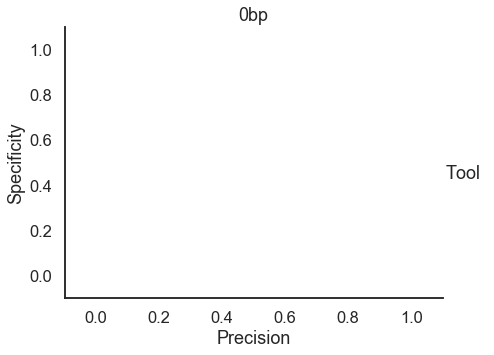

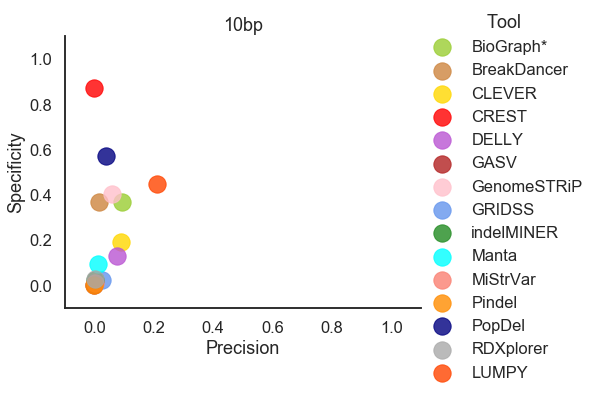

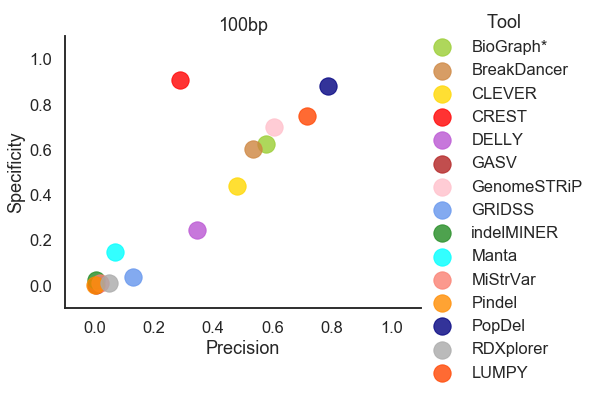

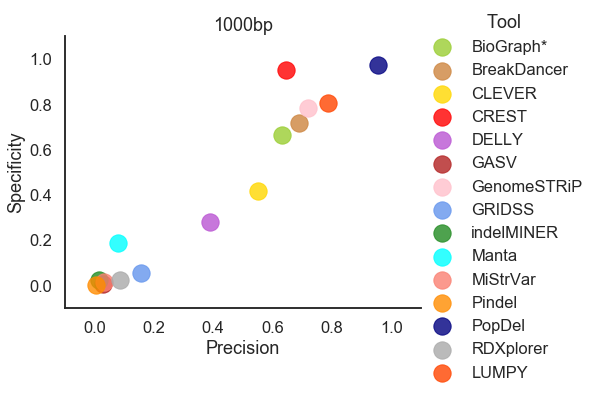

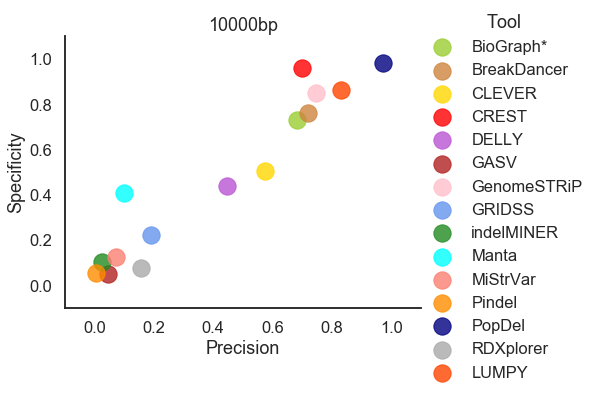

In [41]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='Tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=color_map1)
    g.set(xlabel='Precision', ylabel='Specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1.1)
    g=plt.ylim(-0.1, 1.1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_specificity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_specificity"+str(th)+"t.pdf")


# S8 Specificity 50-100 bp Length Deletions

In [42]:
 df_50_100=pd.read_csv('../Data/analysis_files/df_merged_50-100.csv')

In [43]:
df_50_100

Unnamed: 0       tool  threshold strain     len  nTP  nFP  nTN  \
0                0  BioGraph*         10    A_J  50-100    2  136    0   
1                1  BioGraph*         10    A_J  50-100    2  136    0   
2                2  BioGraph*         10    A_J  50-100    2  136    0   
3                3  BioGraph*         10    A_J  50-100    2  136    0   
4                4  BioGraph*         10    A_J  50-100    2  136    0   
...            ...        ...        ...    ...     ...  ...  ...  ...   
265763      935894   sniffles      10000   LP_J  50-100   11    8    0   
265764      935895   sniffles      10000   LP_J  50-100   11    8    0   
265765      935896   sniffles      10000   LP_J  50-100   11    8    0   
265766      935897   sniffles      10000   LP_J  50-100   11    8    0   
265767      935898   sniffles      10000   LP_J  50-100   11    8    0   

        n_true   nFN  sensitivity  precision  specificity   f-score  
0           37  35.0     0.054054   0.014493          0.0  0.022857  
1           37  35.0     0.054054   0.014493          0.0  0.022857  
2           37  35.0     0.054054   0.014493          0.0  0.022857  
3           37  35.0     0.054054   0.014493          0.0  0.022857  
4           37  35.0     0.054054   0.014493          0.0  0.022857  
...        ...   ...          ...        ...          ...       ...  
265763      35  24.0     0.314286   0.578947          0.0  0.407407  
265764      35  24.0     0.314286   0.578947          0.0  0.407407  
265765      35  24.0     0.314286   0.578947          0.0  0.407407  
265766      35  24.0     0.314286   0.578947          0.0  0.407407  
265767      35  24.0     0.314286   0.578947          0.0  0.407407  

[265768 rows x 14 columns]

In [94]:
# df_sum=df_50_100.groupby(['tool','threshold'],as_index=False)['sensitivity','precision','specificity','f-score'].sum()

# 50-100

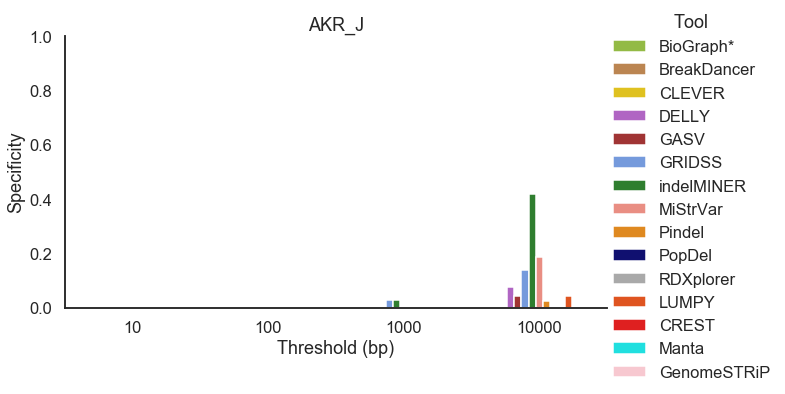

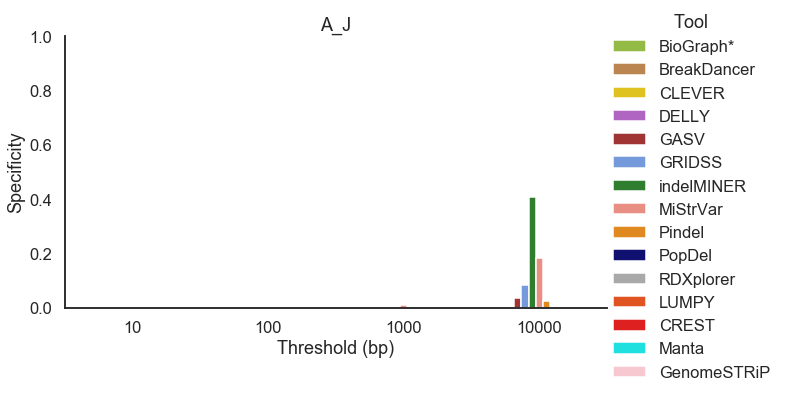

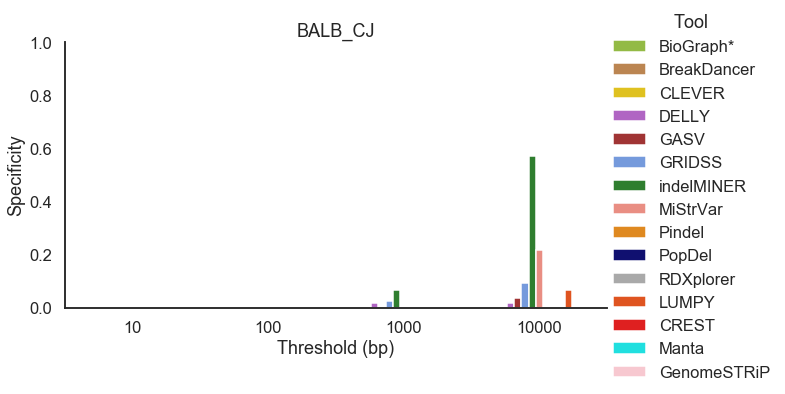

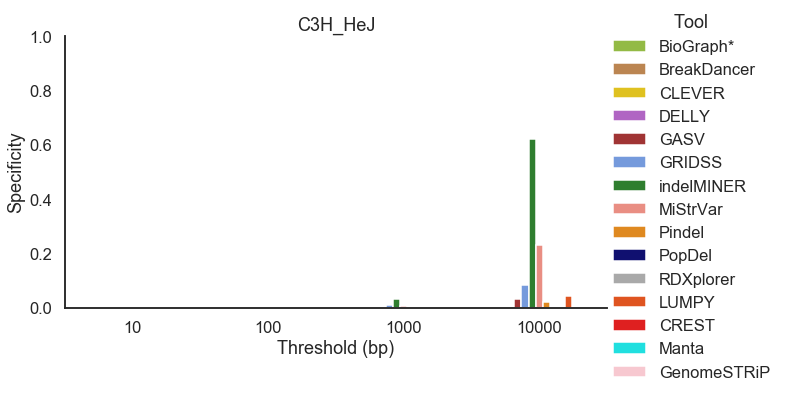

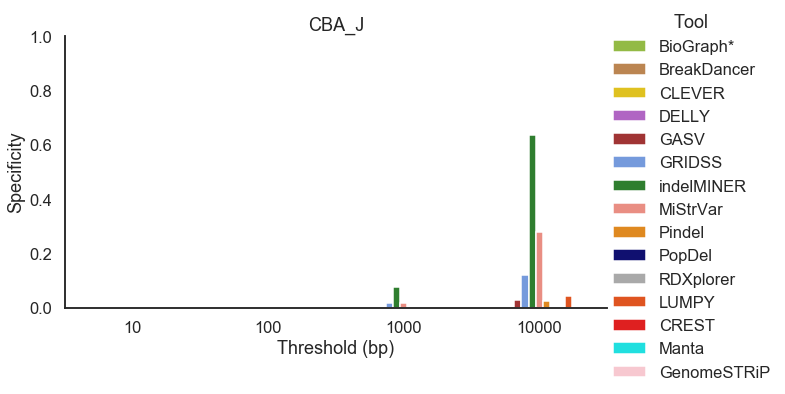

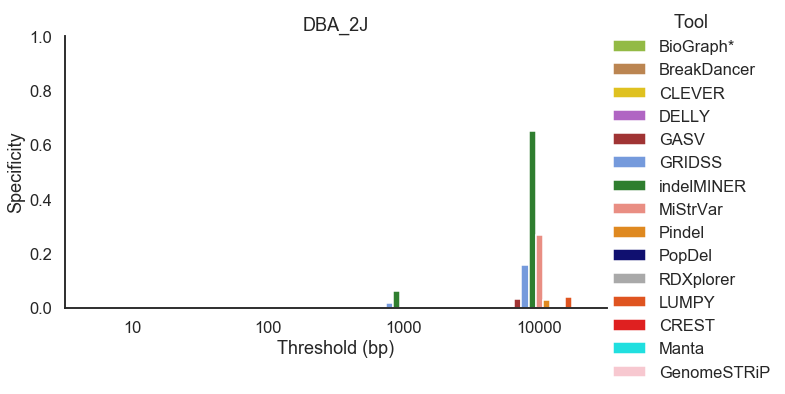

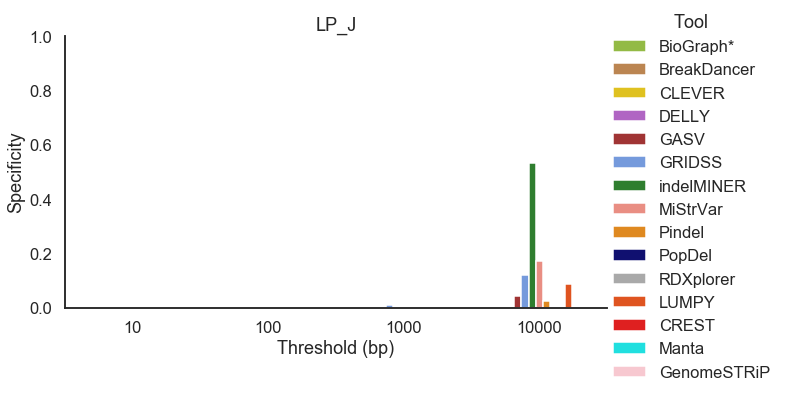

In [44]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_50_100["Tool"] = df_50_100["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    data = df_50_100
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_50_100.loc[df_50_100['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=pal)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_50_100_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_50_100_"+s+".pdf")

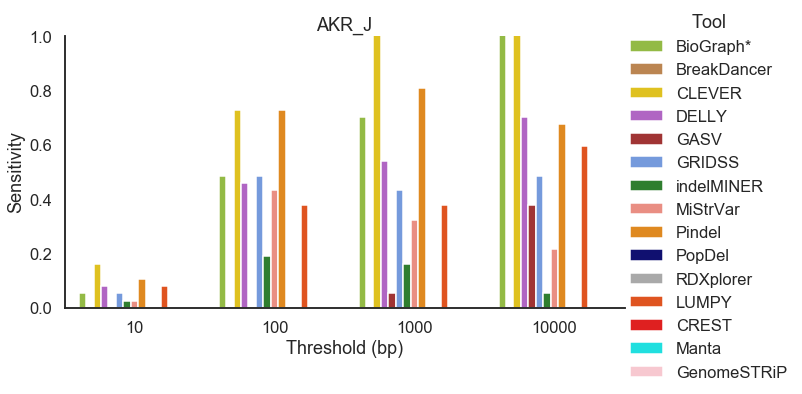

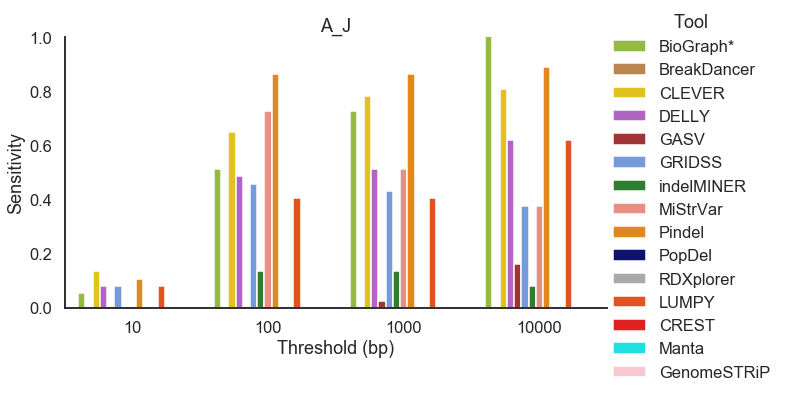

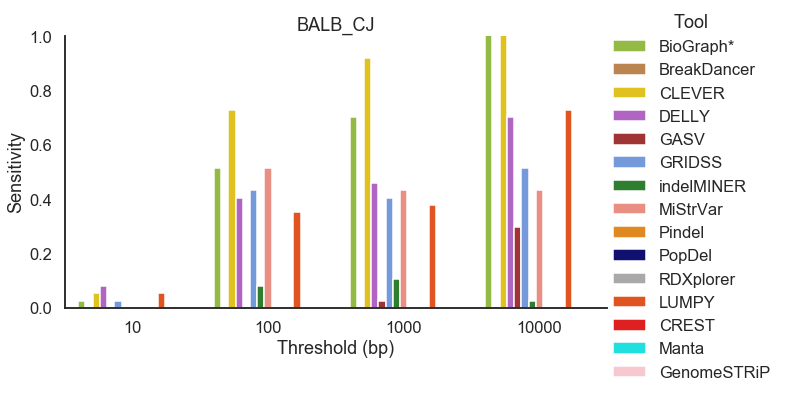

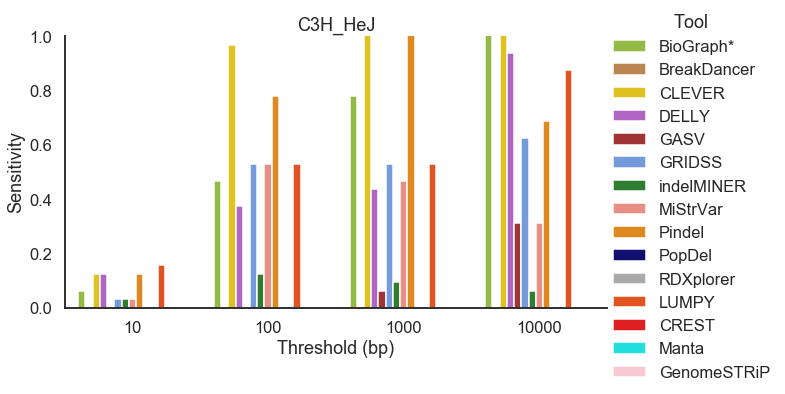

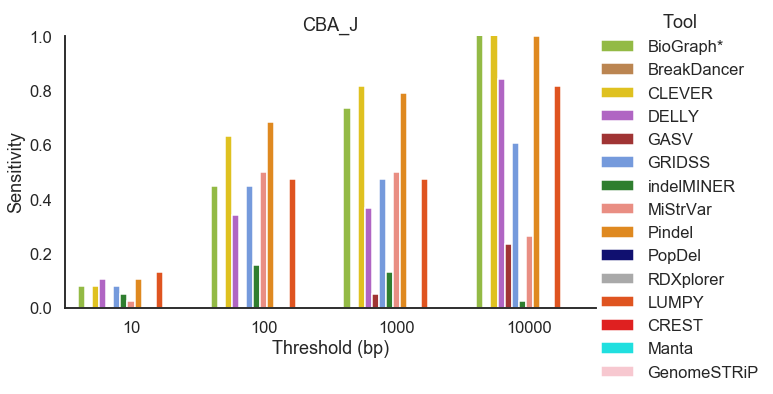

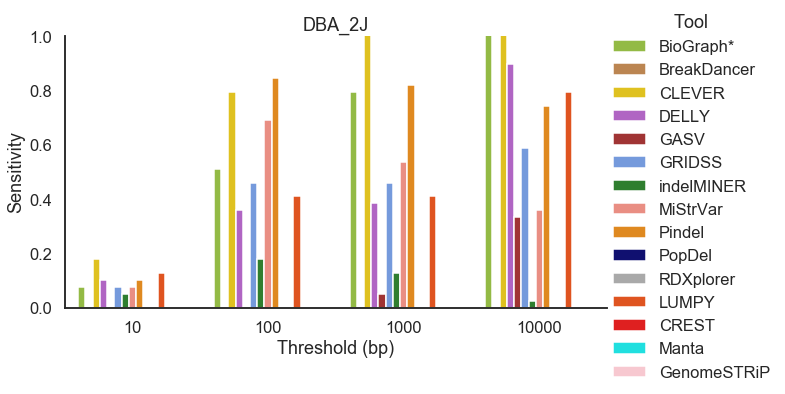

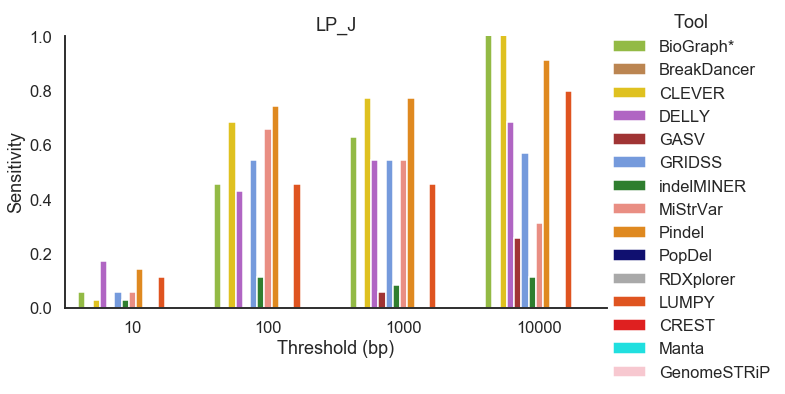

In [45]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_50_100["Tool"] = df_50_100["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    data = df_50_100
    g = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_50_100.loc[df_50_100['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=pal)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_50_100_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_50_100_"+s+".pdf")

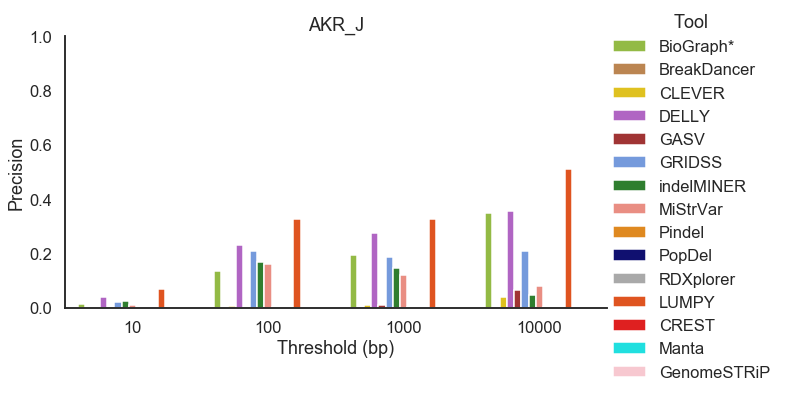

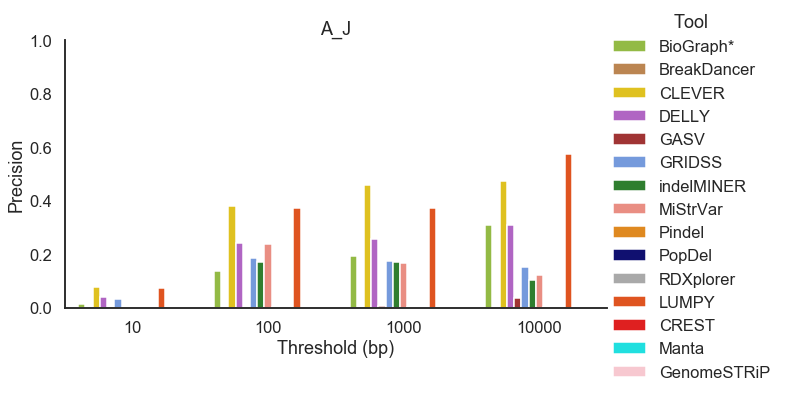

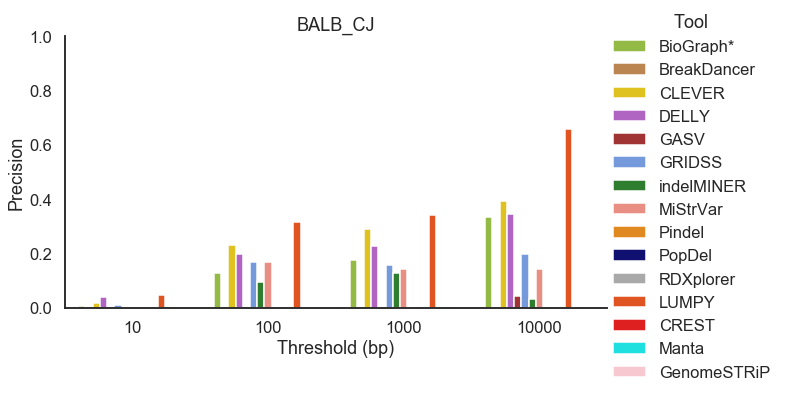

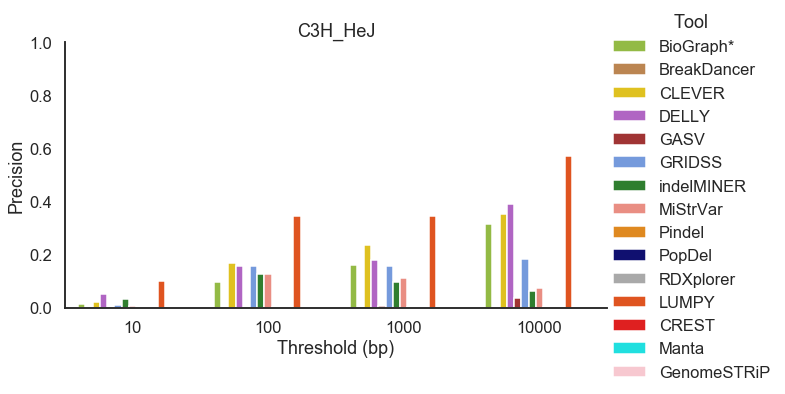

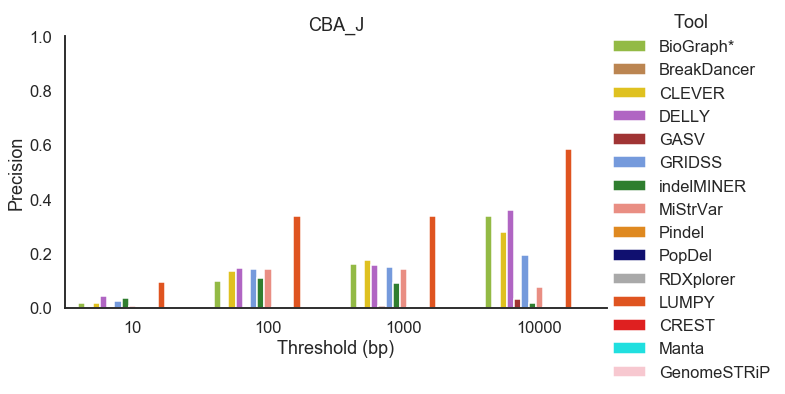

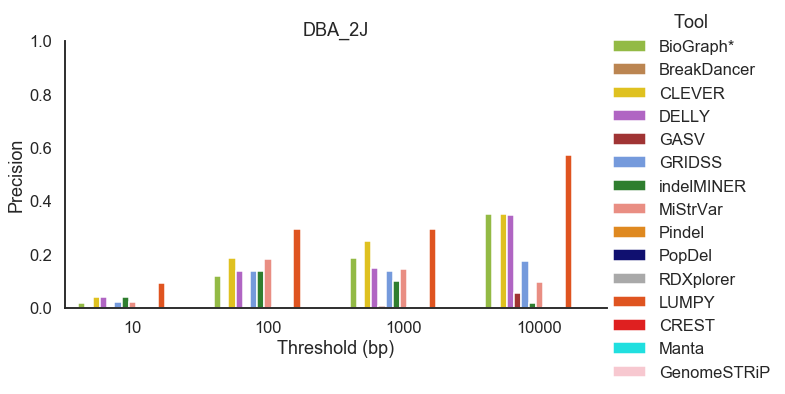

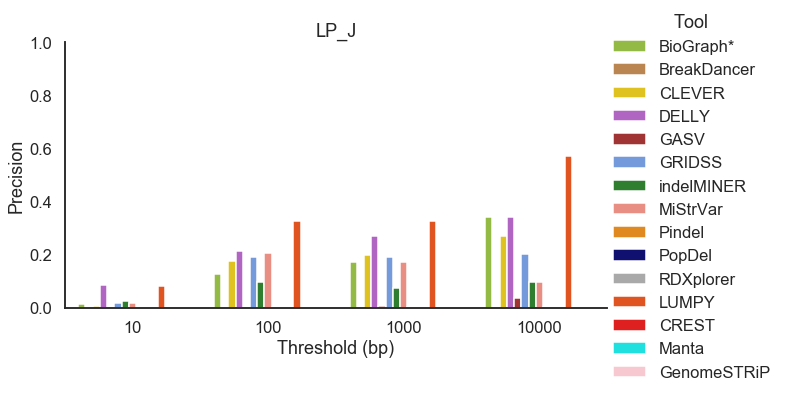

In [46]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_50_100["Tool"] = df_50_100["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    data = df_50_100
    g = sns.catplot(x="threshold", y="precision", kind="bar",data = df_50_100.loc[df_50_100['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=pal)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_50_100_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_50_100_"+s+".pdf")

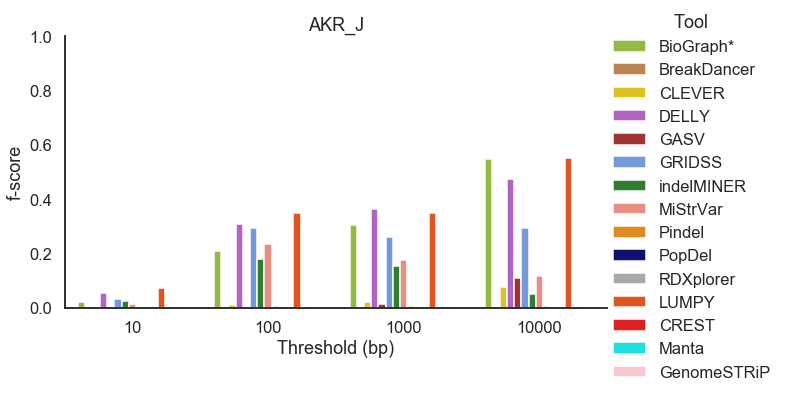

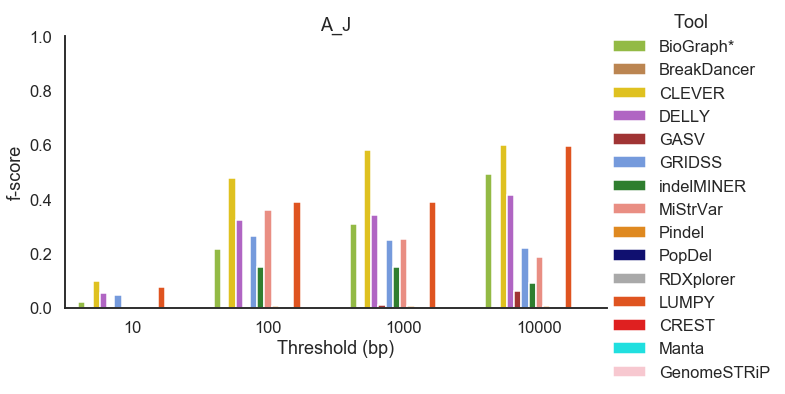

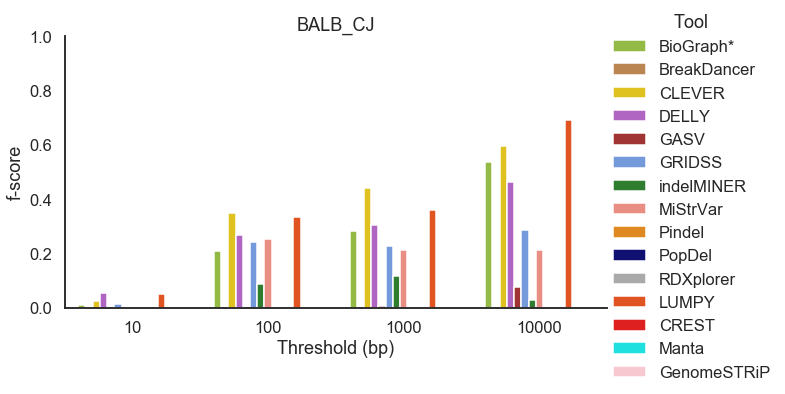

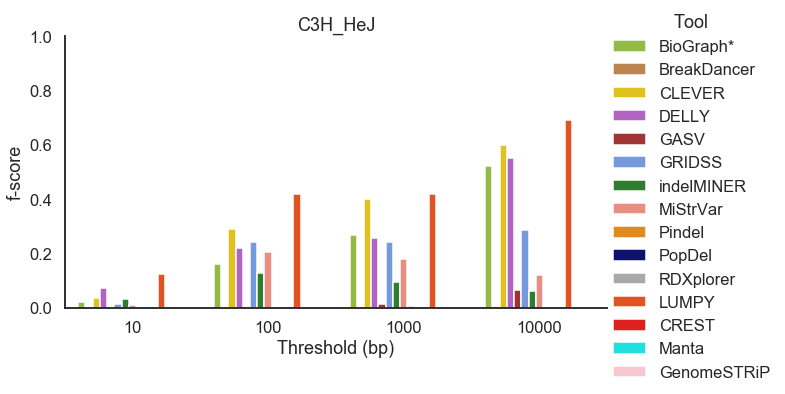

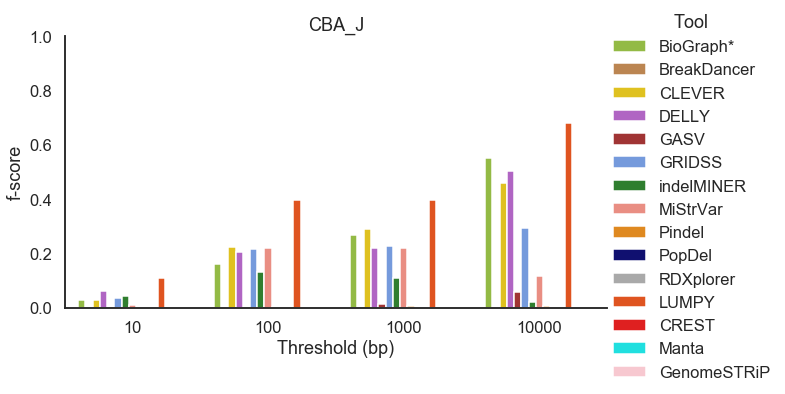

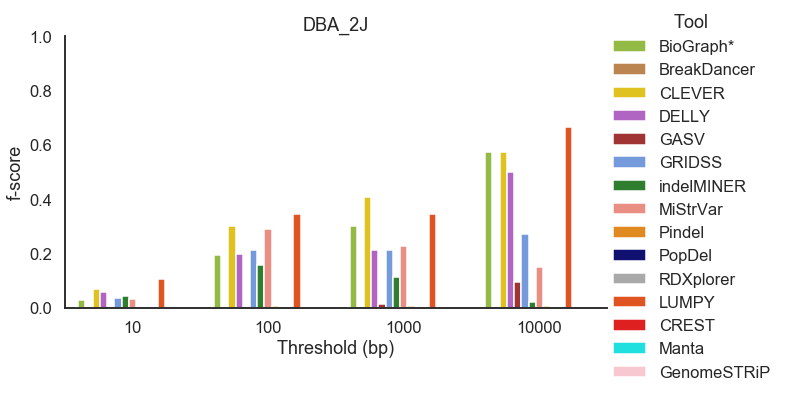

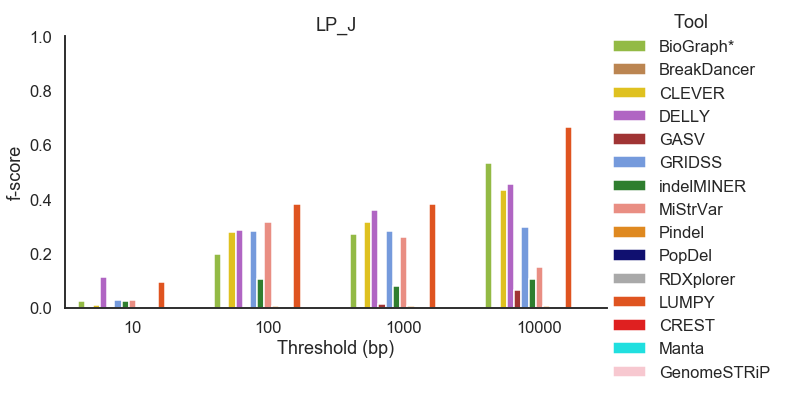

In [48]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_50_100["Tool"] = df_50_100["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    data = df_50_100
    g = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_50_100.loc[df_50_100['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=pal)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='f-score')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_50_100_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_50_100_"+s+".pdf")

# 100-500

In [49]:
 df_100_500=pd.read_csv('../Data/analysis_files/df_merged_100-500.csv')

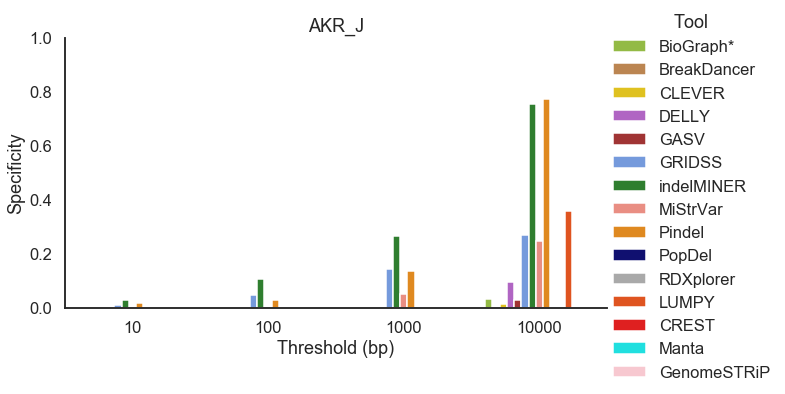

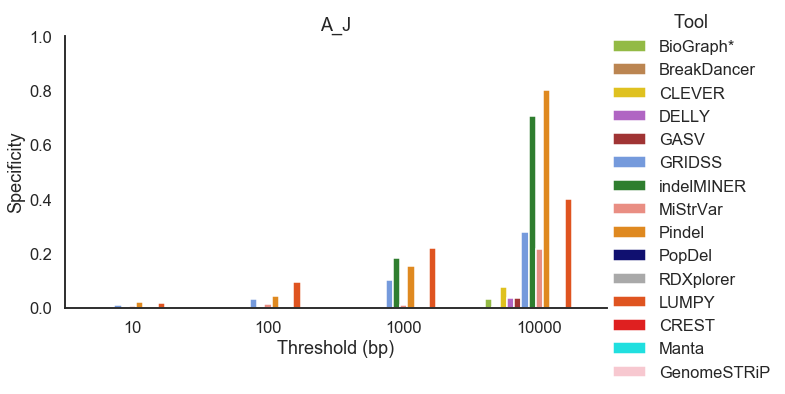

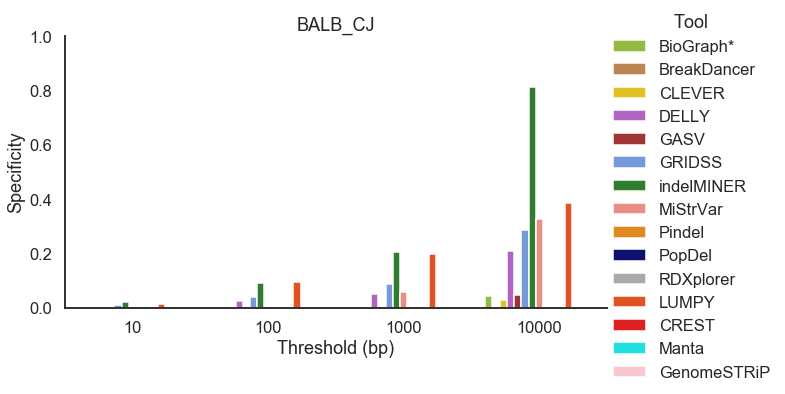

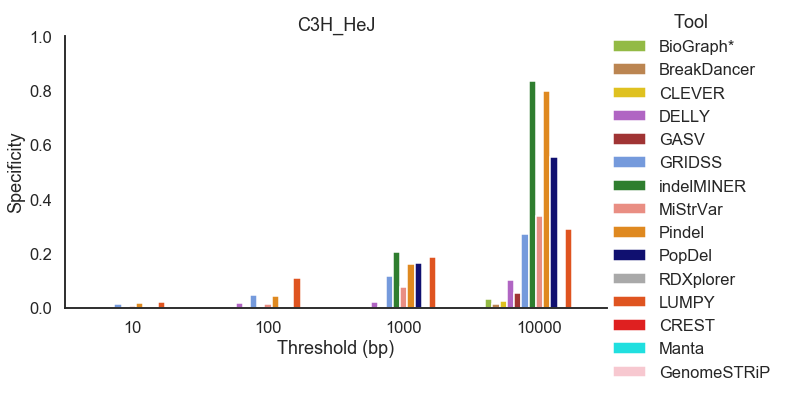

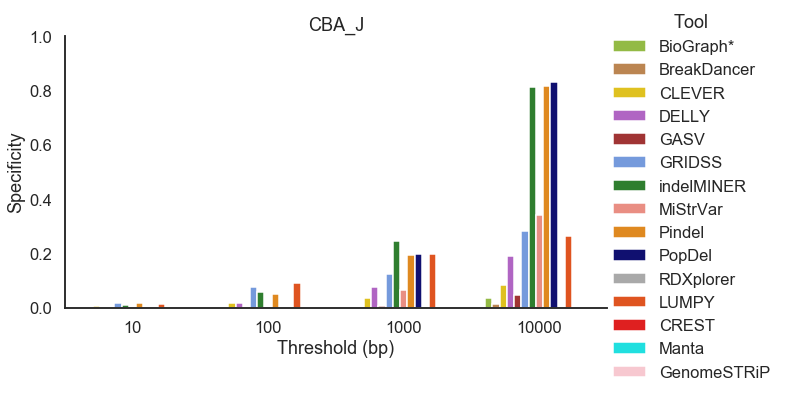

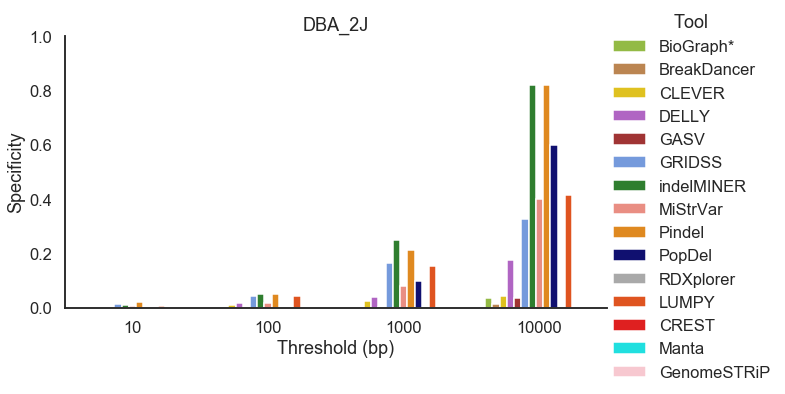

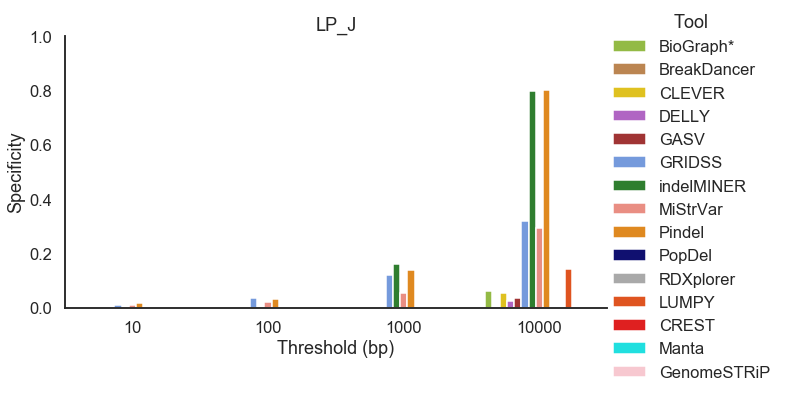

In [50]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_100_500["Tool"] = df_100_500["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    
    data = df_100_500
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_100_500.loc[df_100_500['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".pdf")

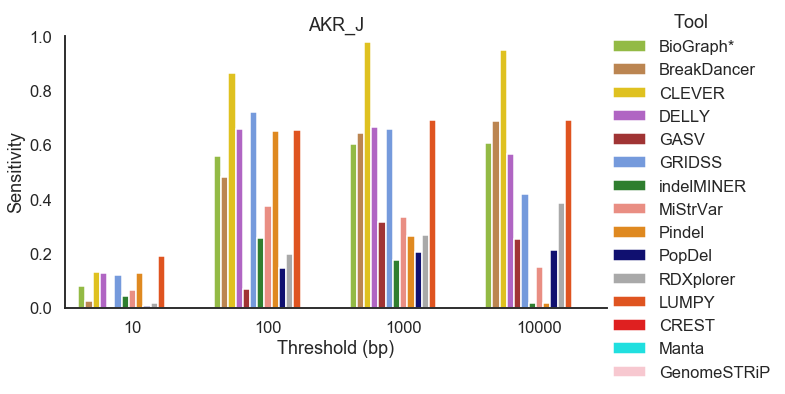

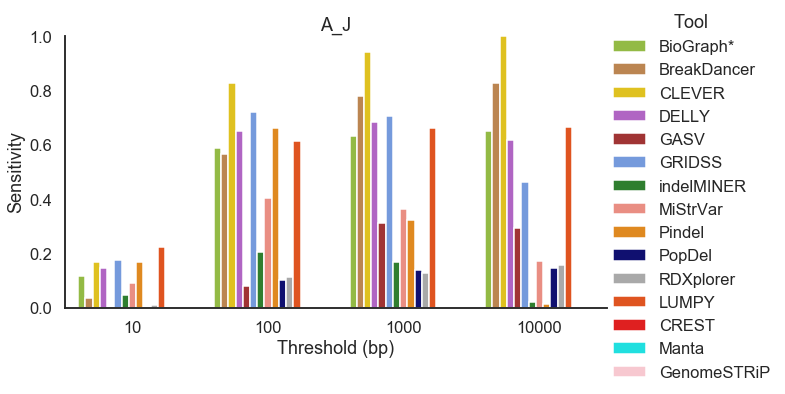

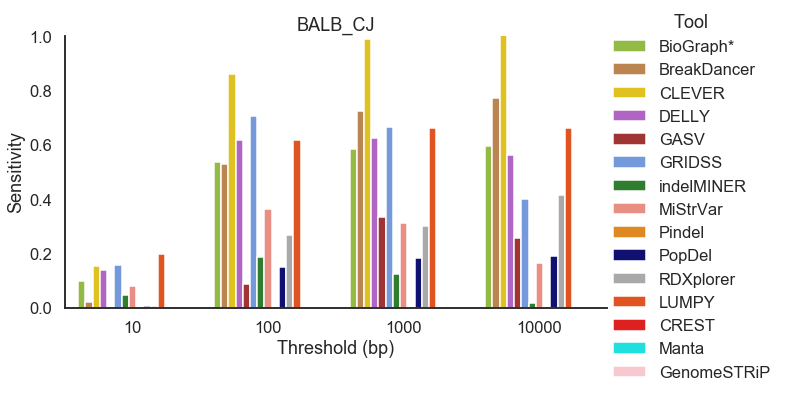

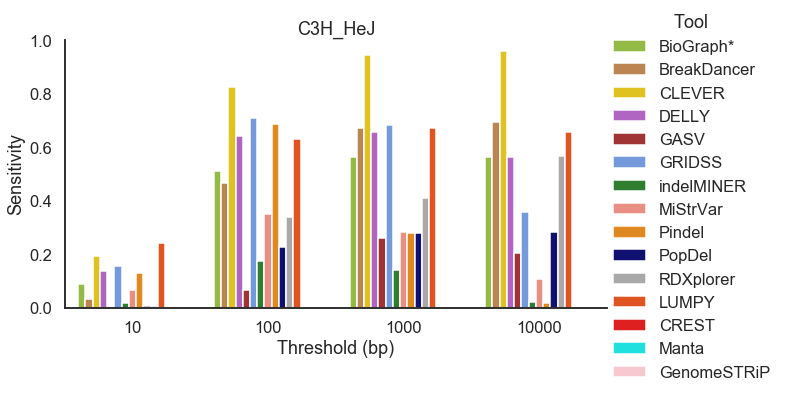

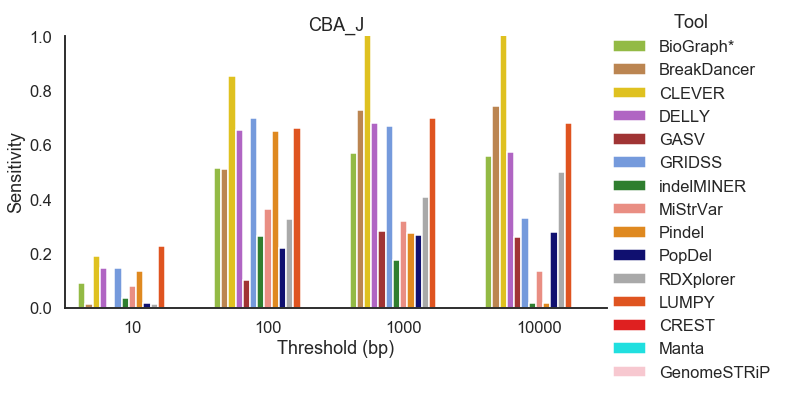

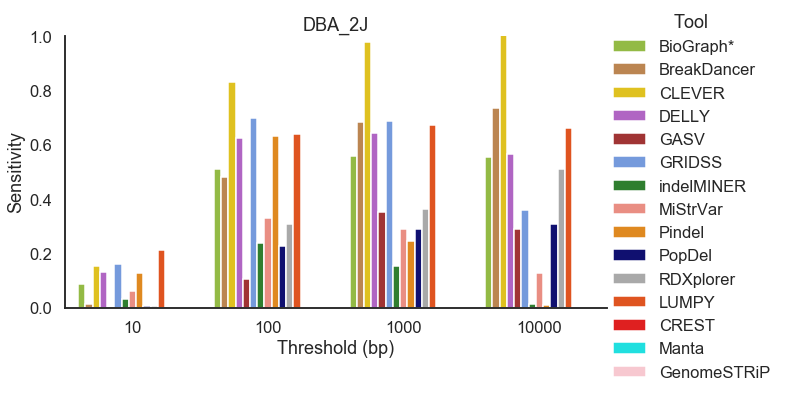

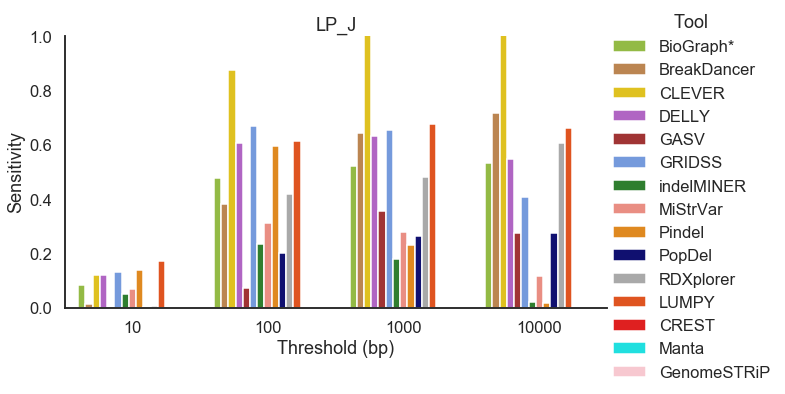

In [51]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_100_500["Tool"] = df_100_500["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    
    data = df_100_500
    g = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_100_500.loc[df_100_500['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_100_500_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_100_500_"+s+".pdf")

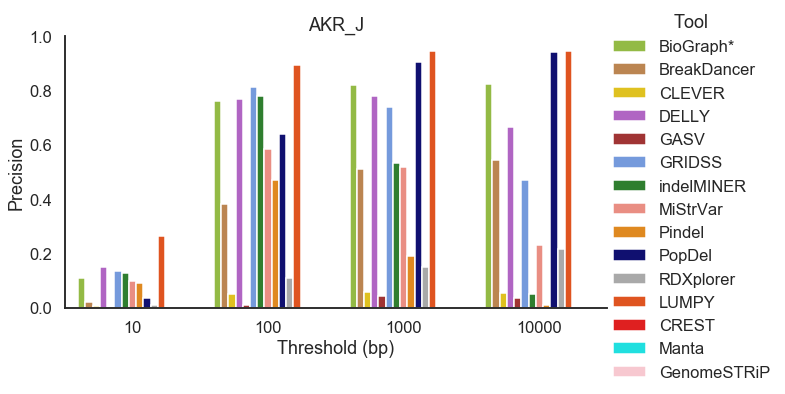

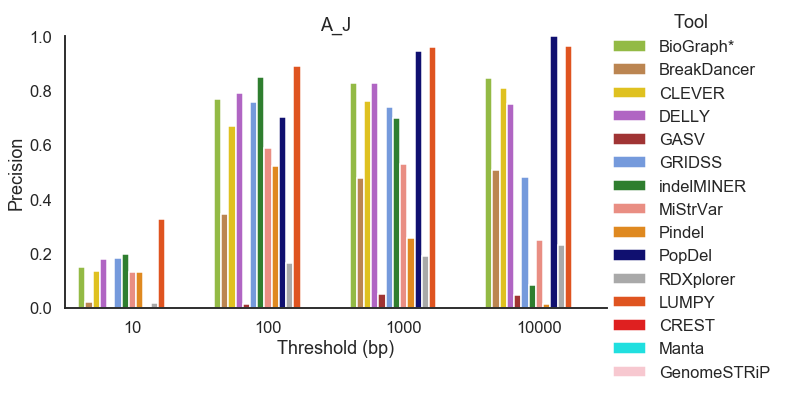

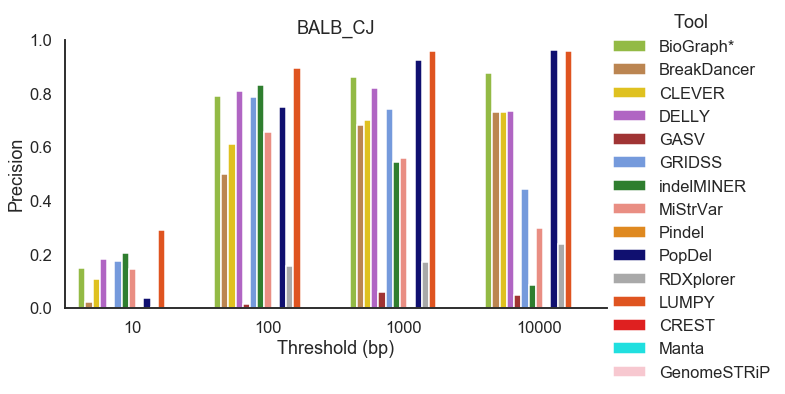

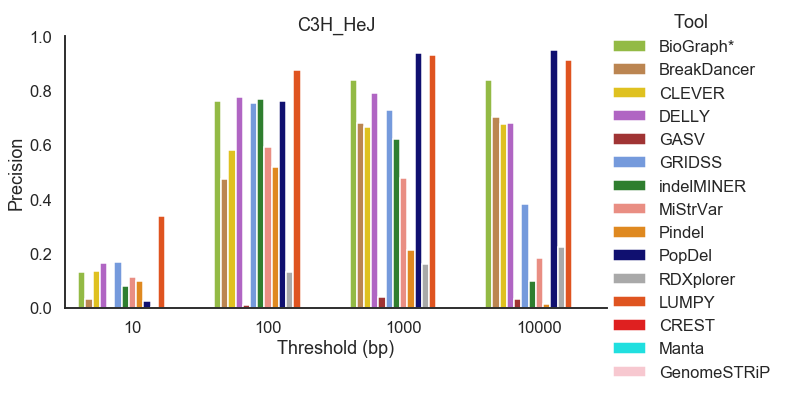

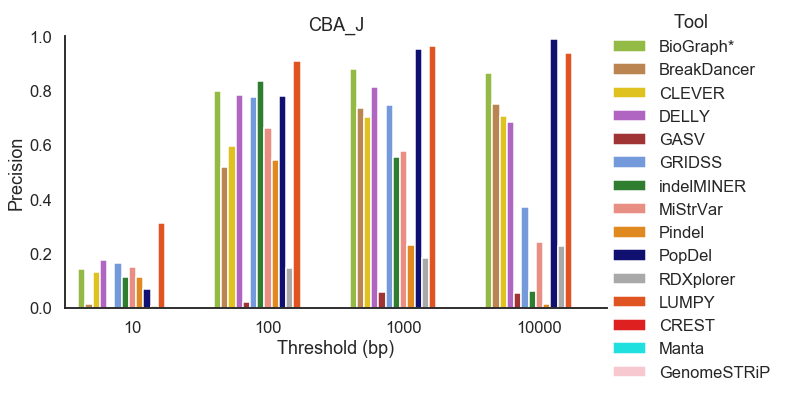

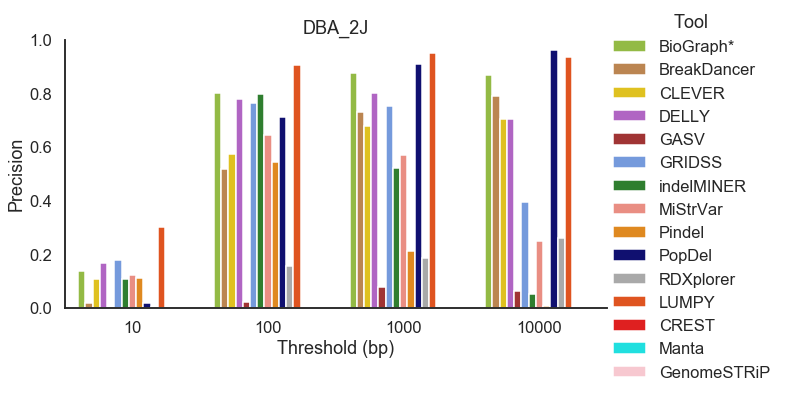

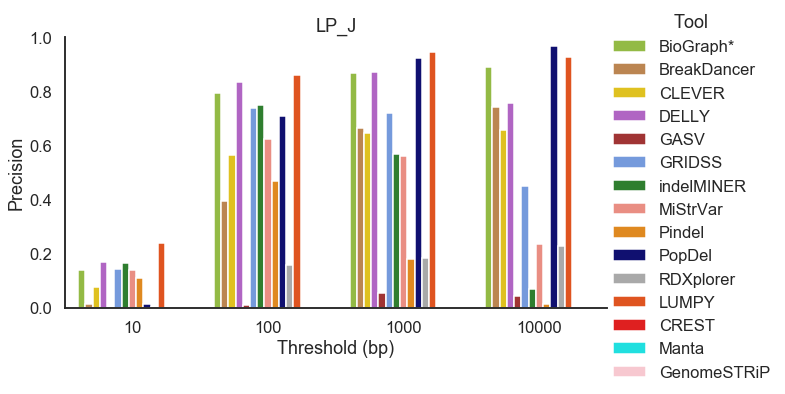

In [52]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_100_500["Tool"] = df_100_500["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    
    data = df_100_500
    g = sns.catplot(x="threshold", y="precision", kind="bar",data = df_100_500.loc[df_100_500['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_100_500_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_100_500_"+s+".pdf")

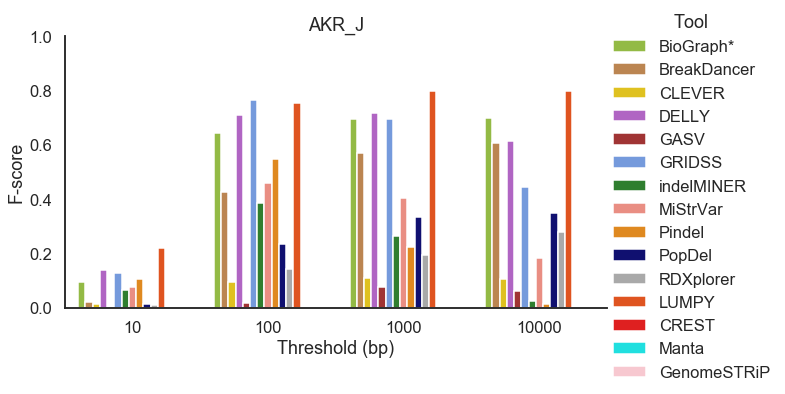

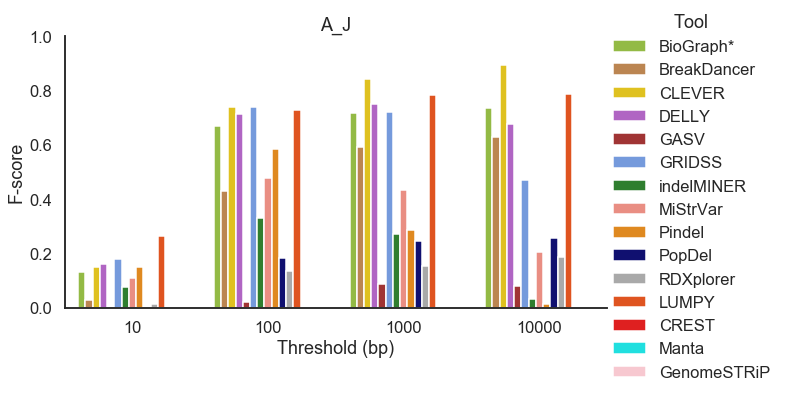

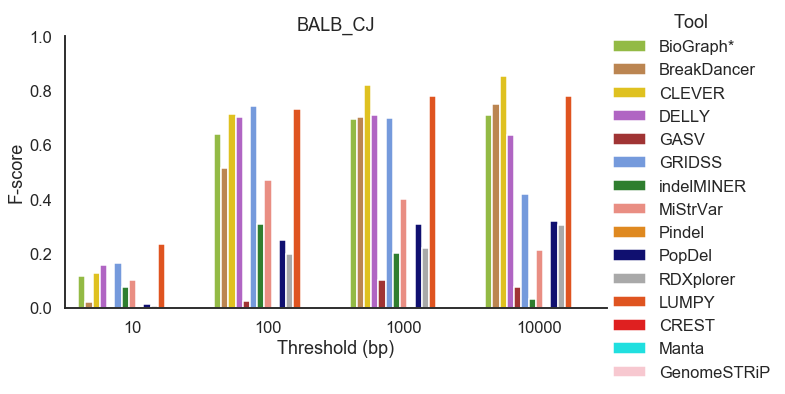

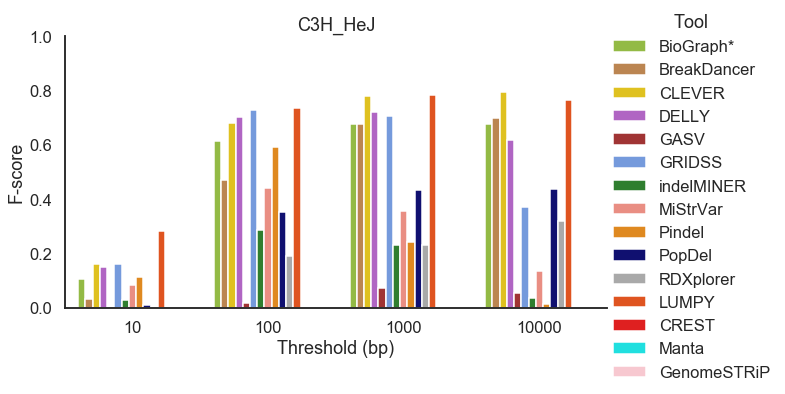

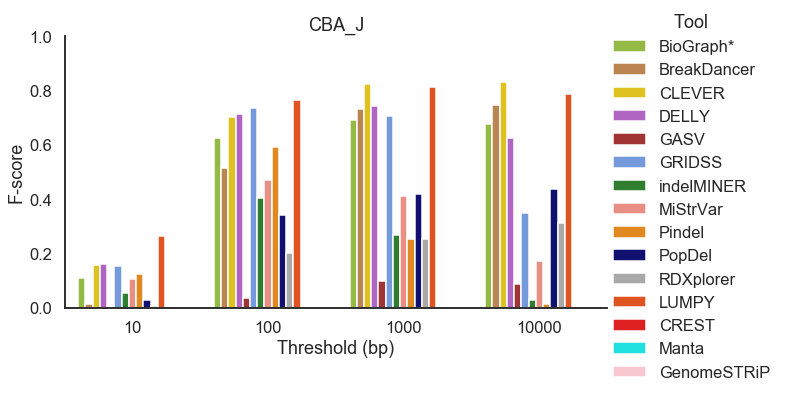

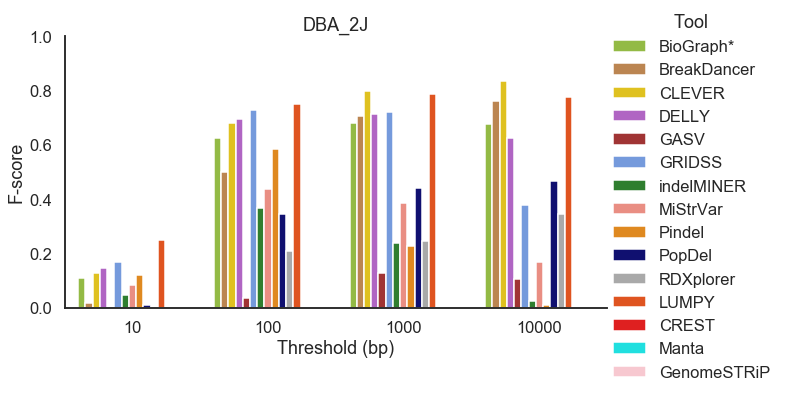

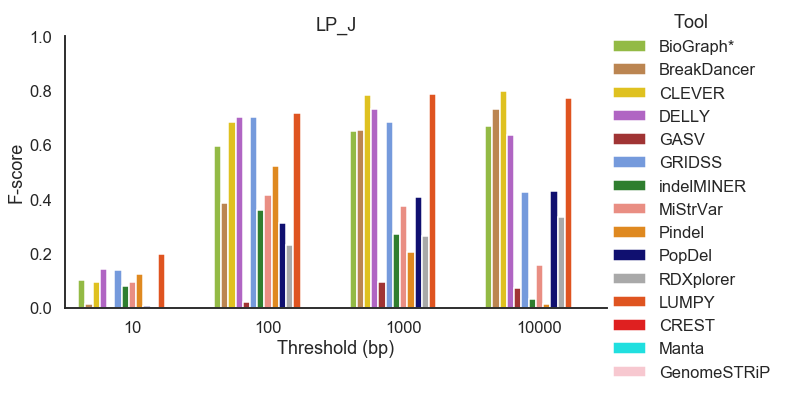

In [53]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_100_500["Tool"] = df_100_500["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    
    data = df_100_500
    g = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_100_500.loc[df_100_500['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_100_500_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_100_500_"+s+".pdf")

# S9 Specificity 500-1000 bp Length Deletions

In [54]:
 df_500_1000=pd.read_csv('../Data/analysis_files/df_merged_500-1000.csv')

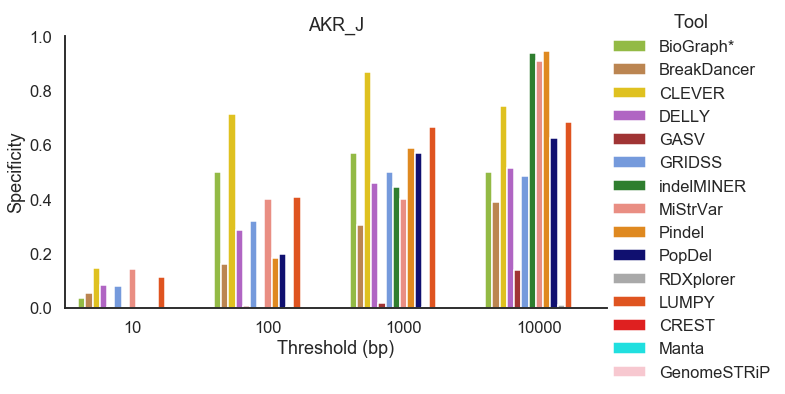

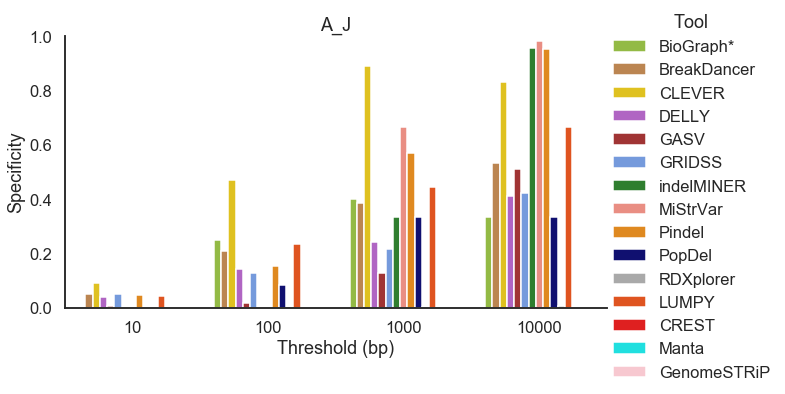

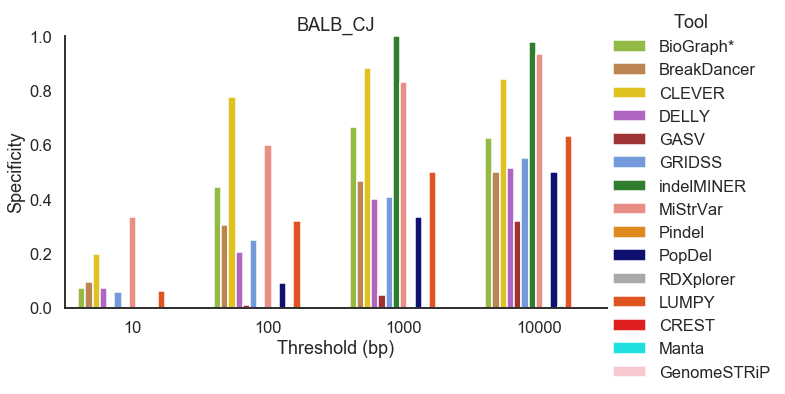

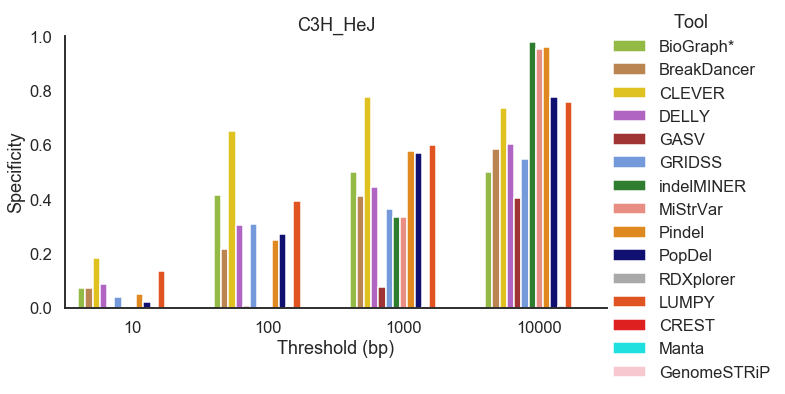

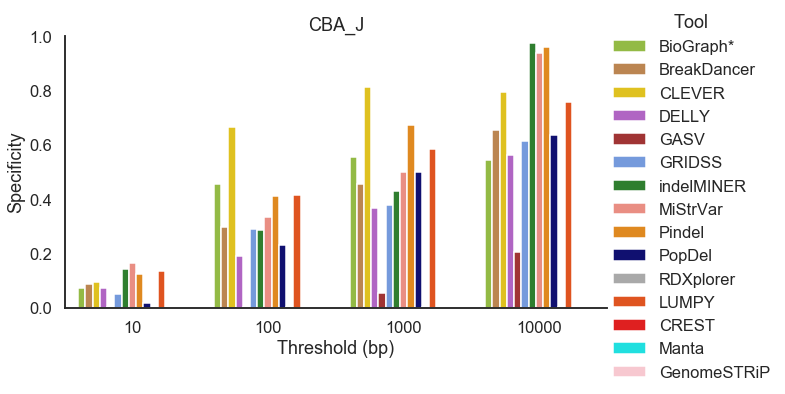

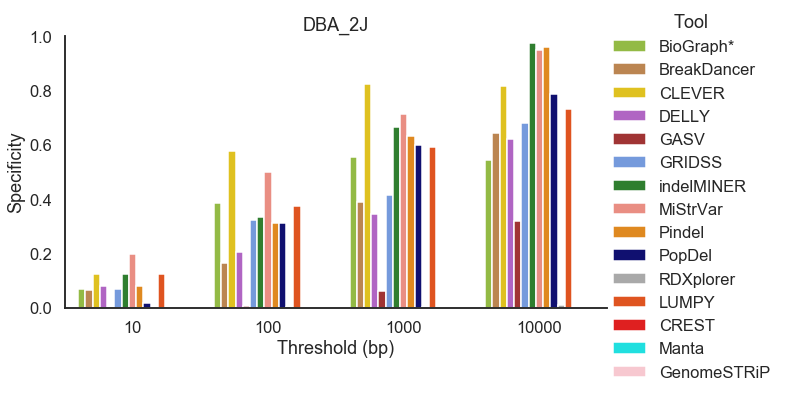

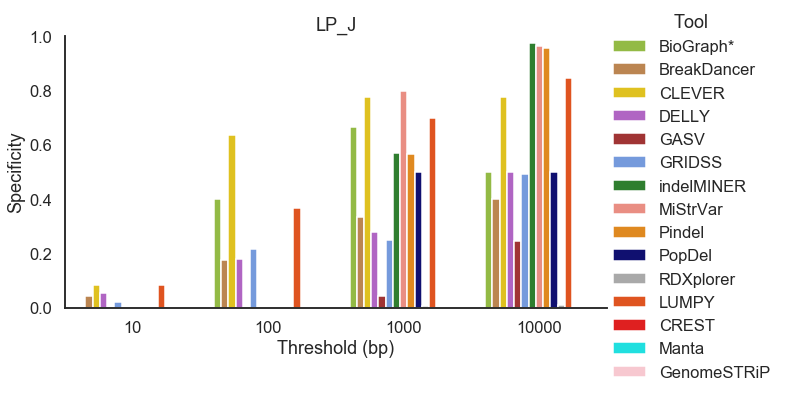

In [55]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_500_1000["Tool"] = df_500_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_500_1000.loc[df_500_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_500_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_500_1000_"+s+".pdf")

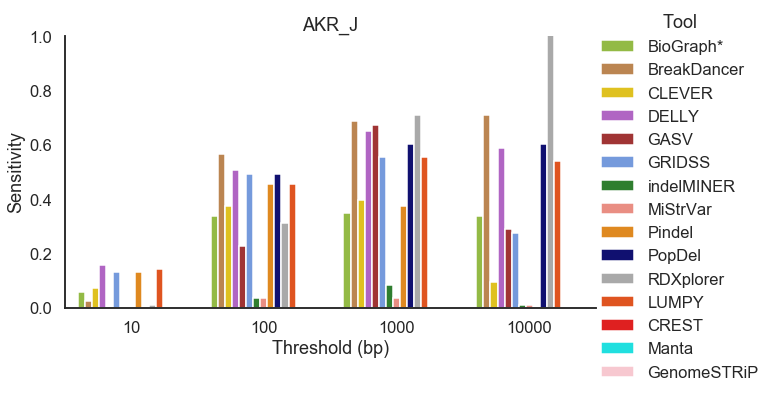

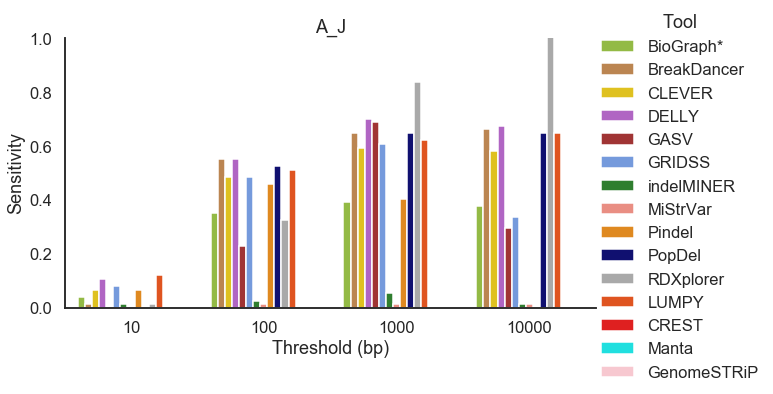

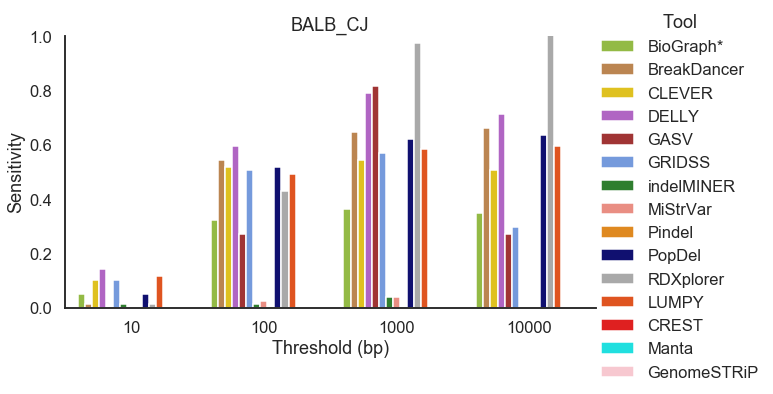

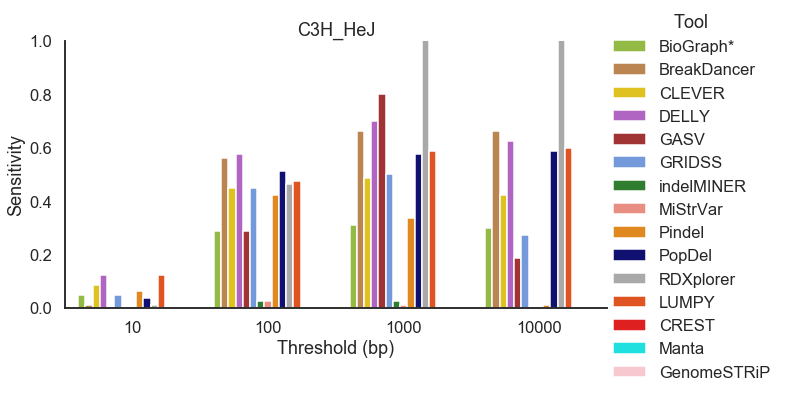

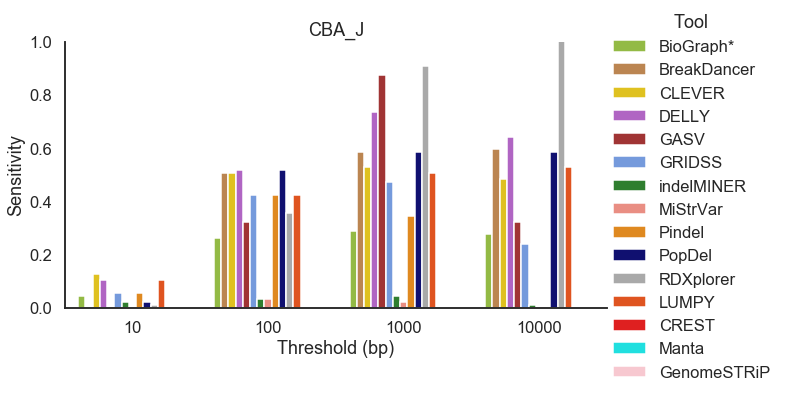

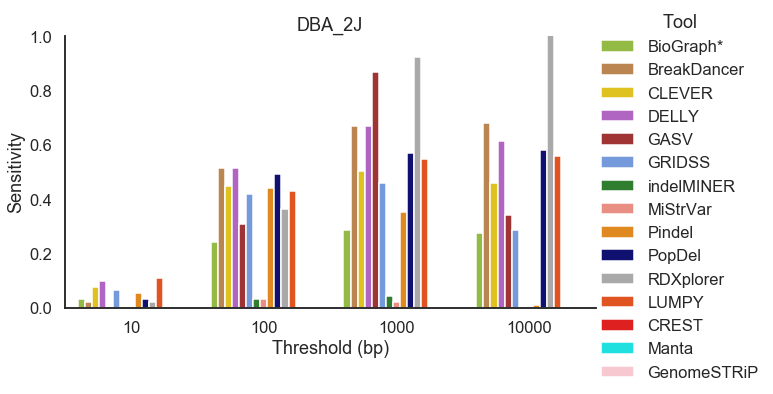

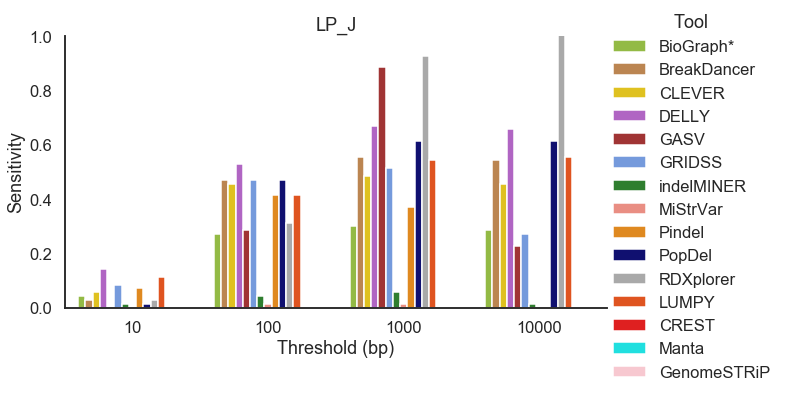

In [56]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_500_1000["Tool"] = df_500_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_500_1000.loc[df_500_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_500_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_500_1000_"+s+".pdf")

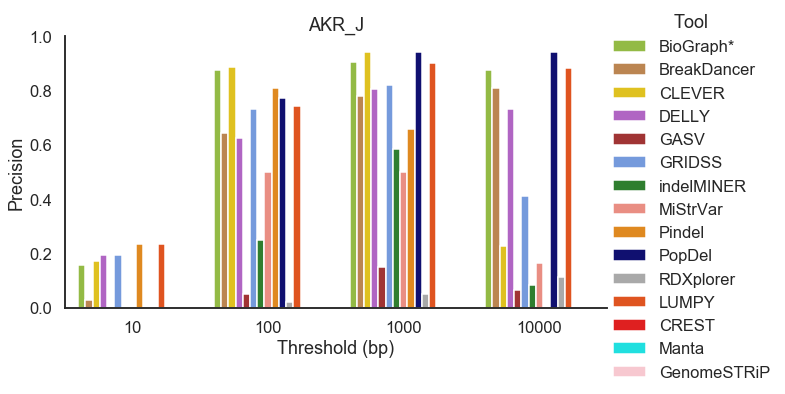

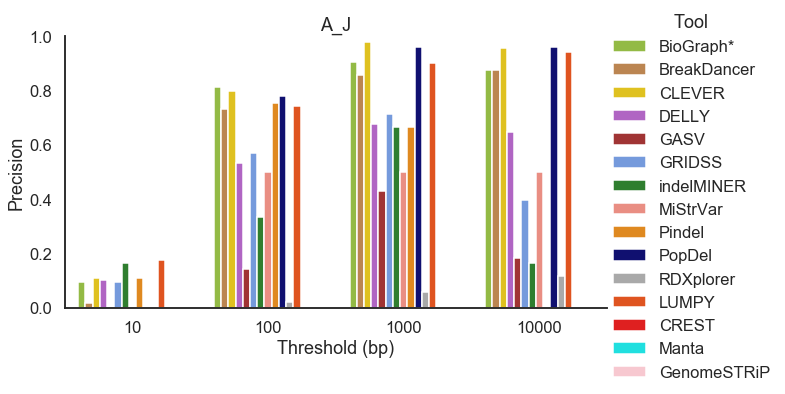

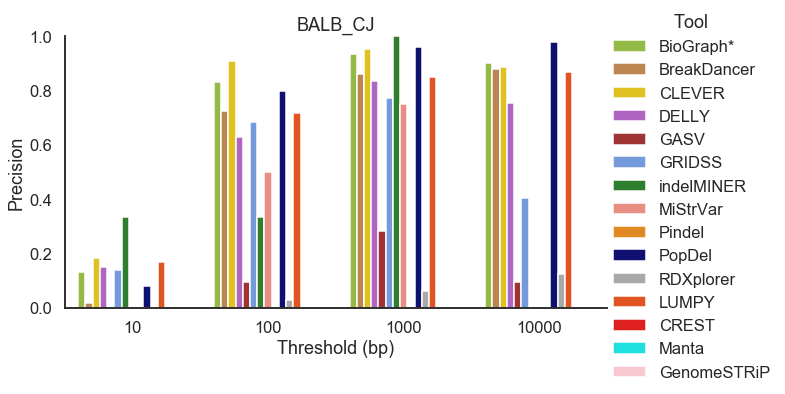

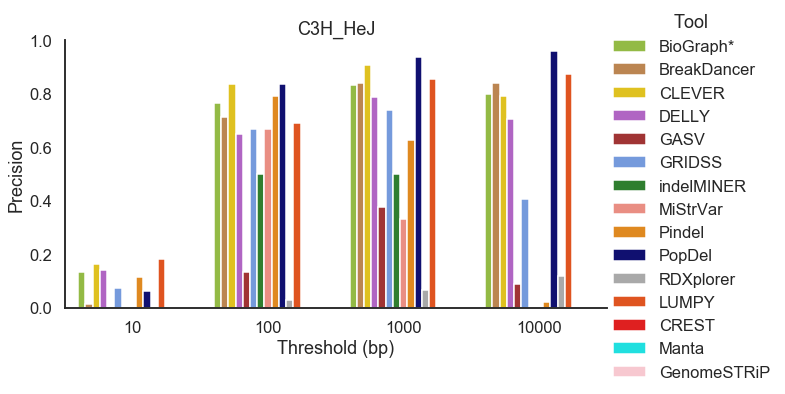

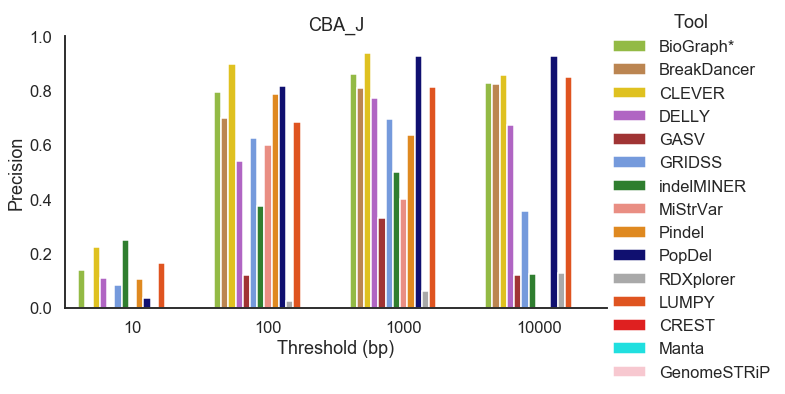

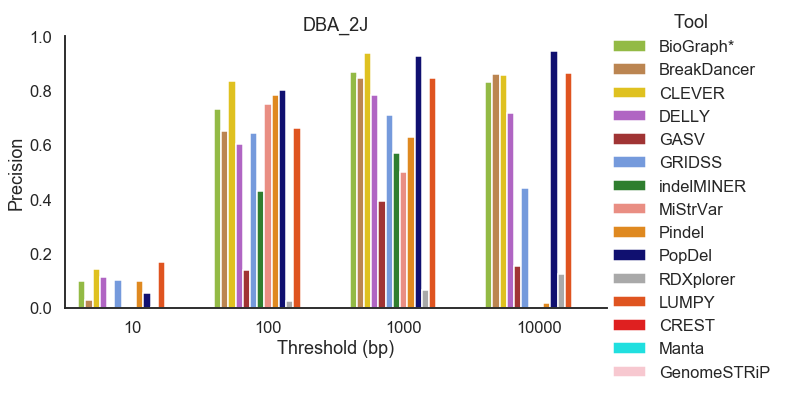

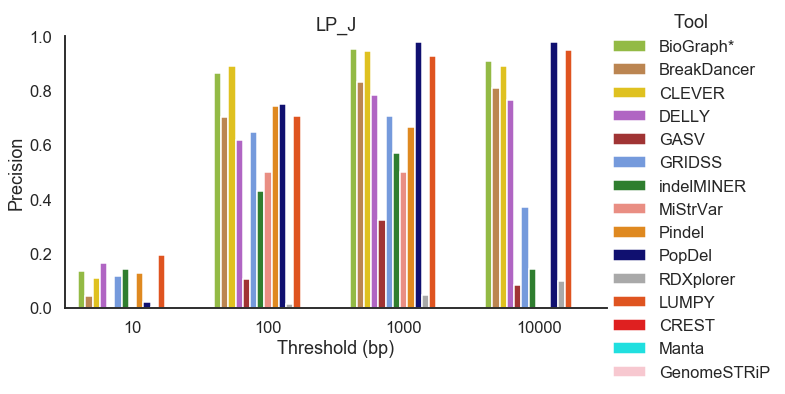

In [57]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_500_1000["Tool"] = df_500_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="precision", kind="bar",data = df_500_1000.loc[df_500_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_500_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_500_1000_"+s+".pdf")

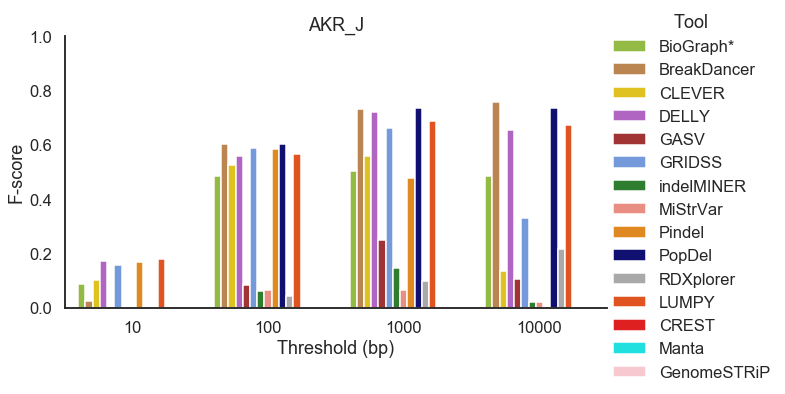

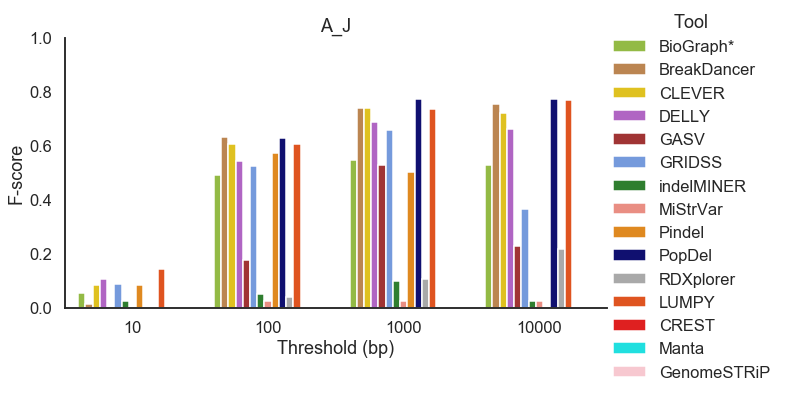

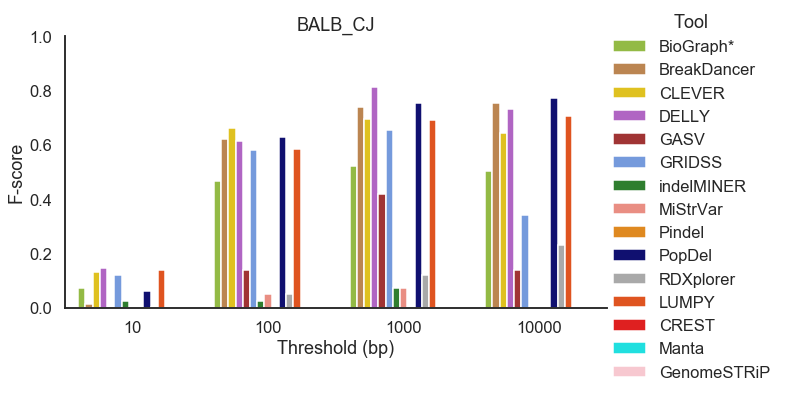

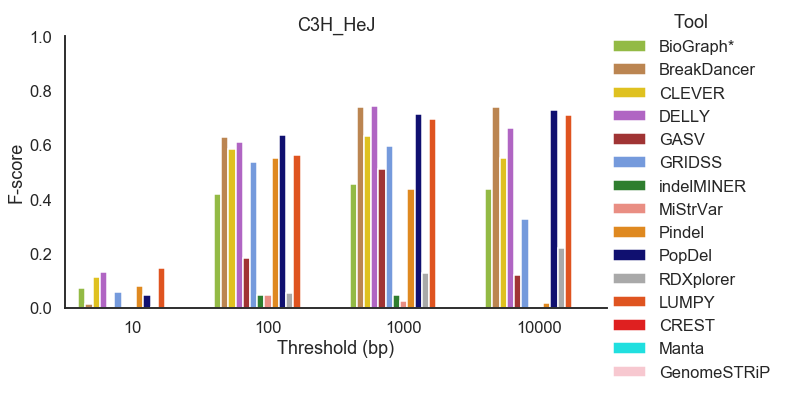

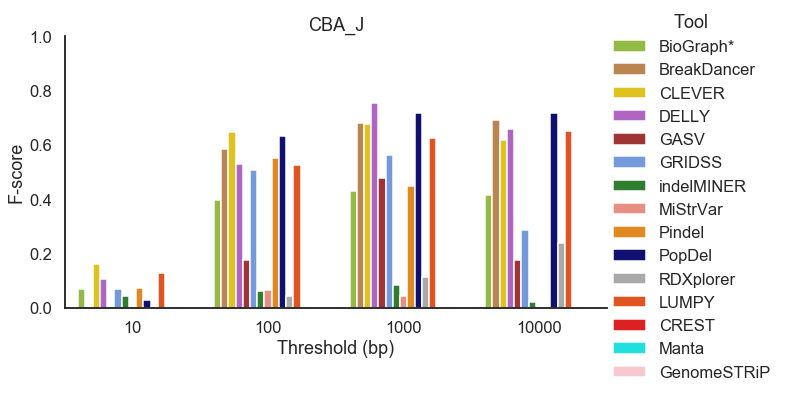

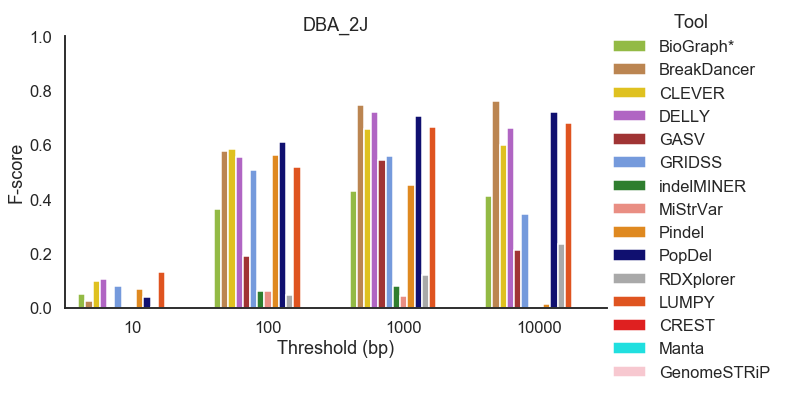

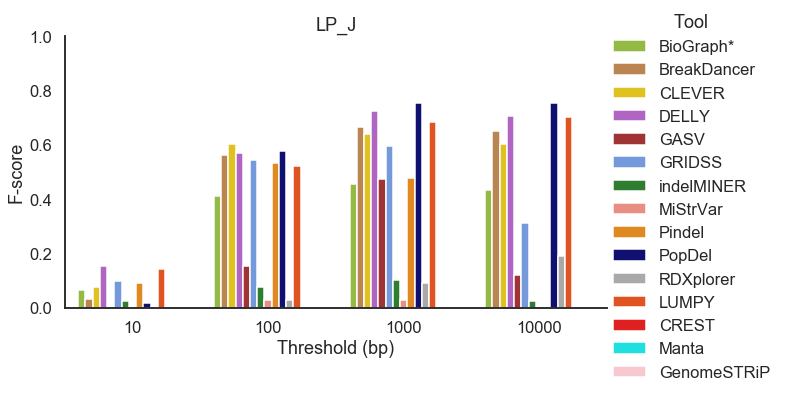

In [58]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_500_1000["Tool"] = df_500_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_500_1000.loc[df_500_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_500_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_500_1000_"+s+".pdf")

# S10 Specificity 1000+ bp Length Deletions

In [59]:
 df_1000=pd.read_csv('../Data/analysis_files/df_merged_1000+.csv')

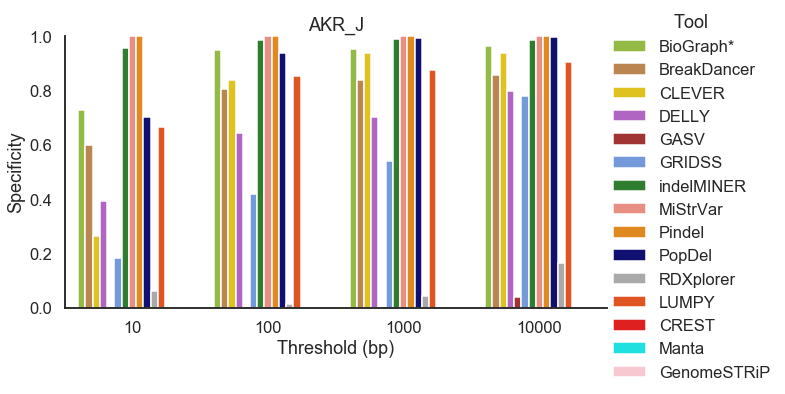

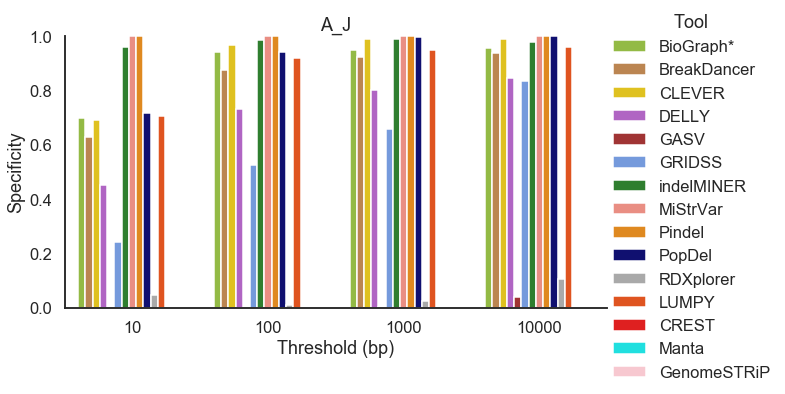

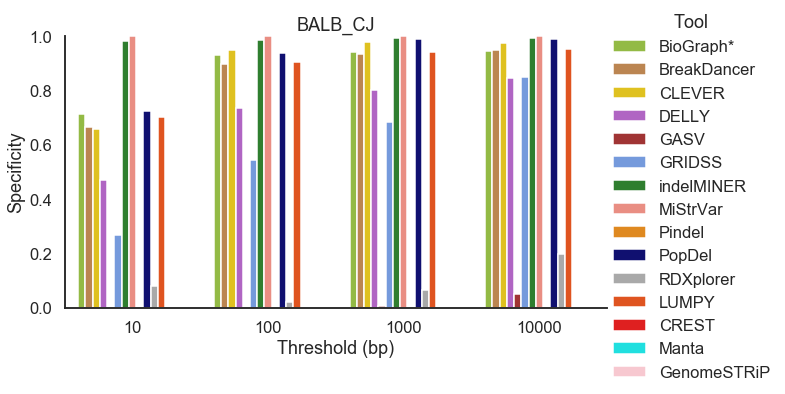

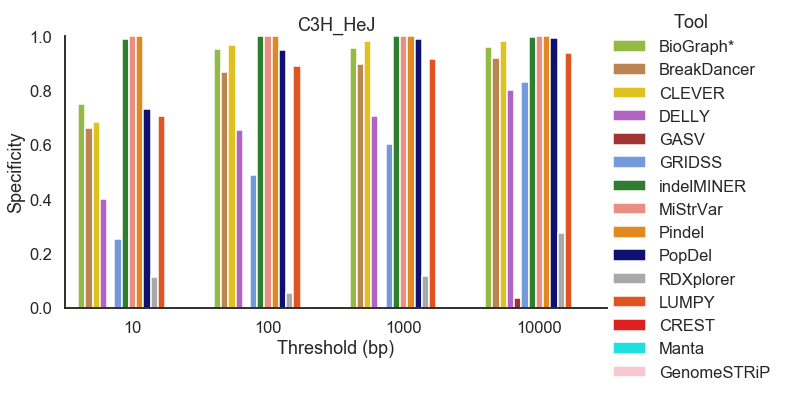

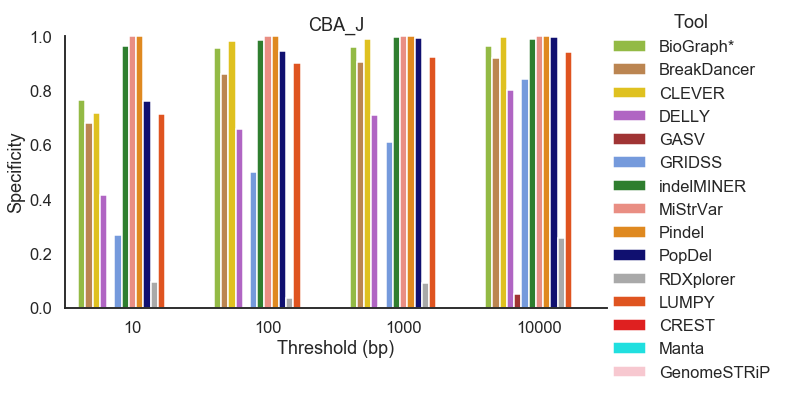

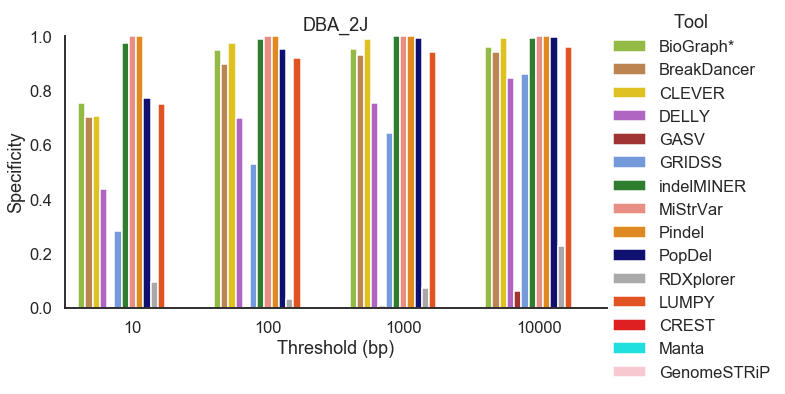

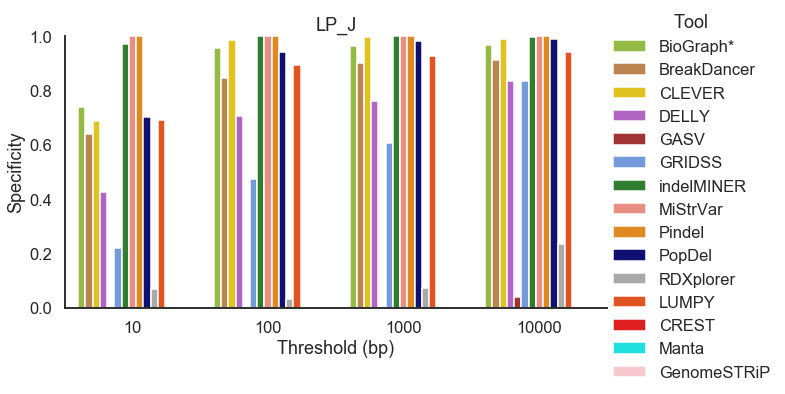

In [60]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_1000["Tool"] = df_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_1000.loc[df_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_1000_"+s+".pdf")

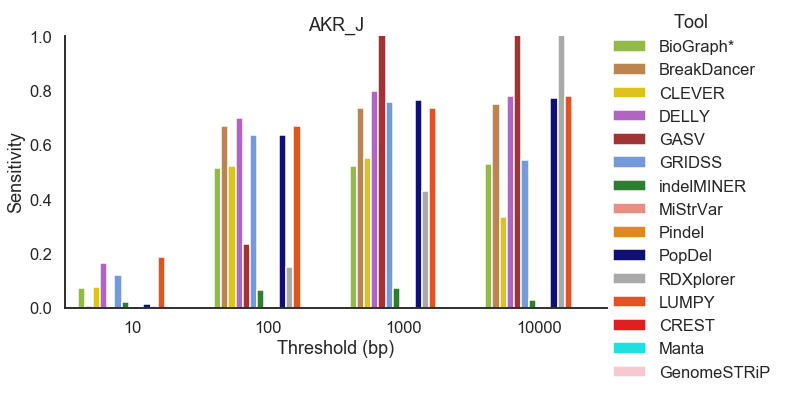

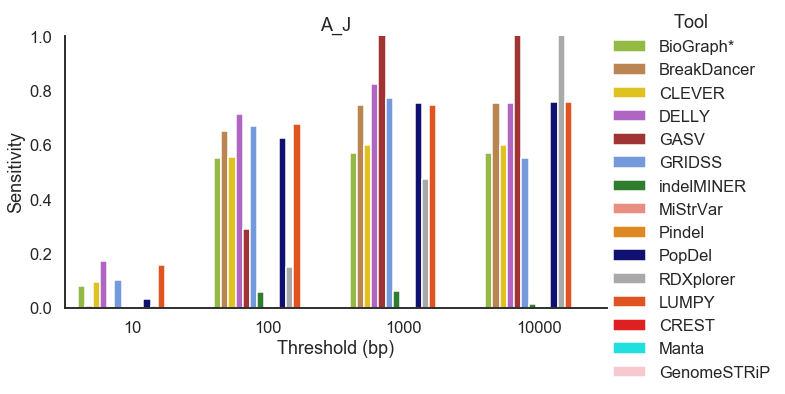

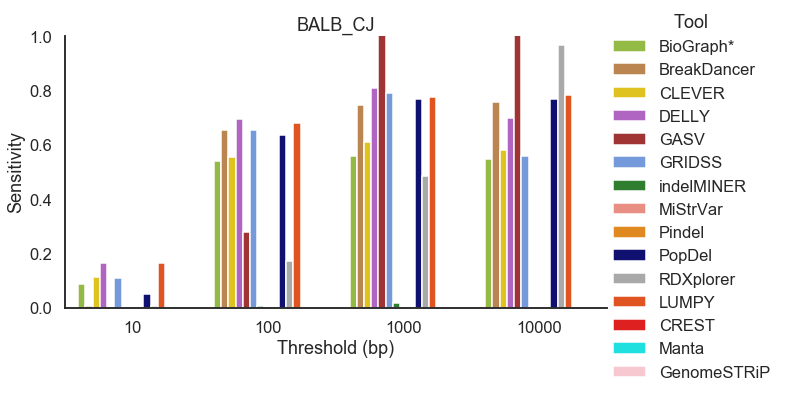

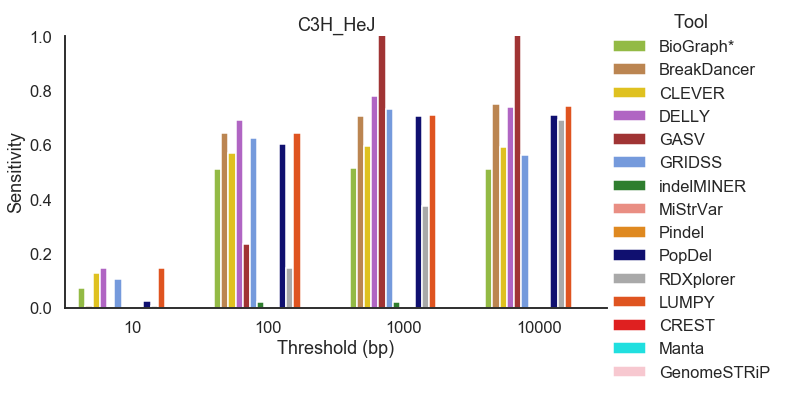

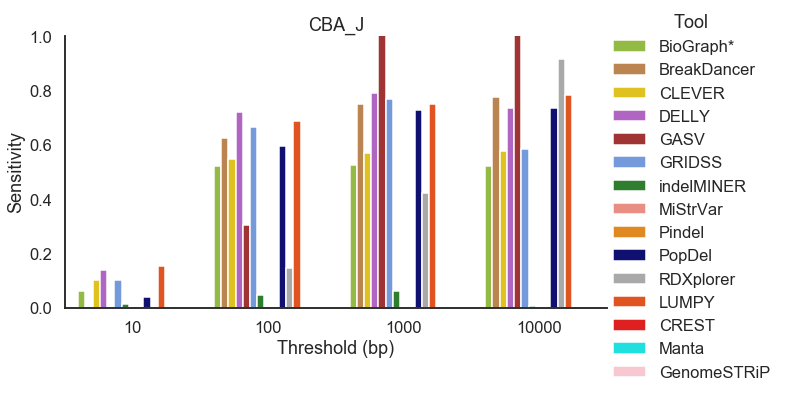

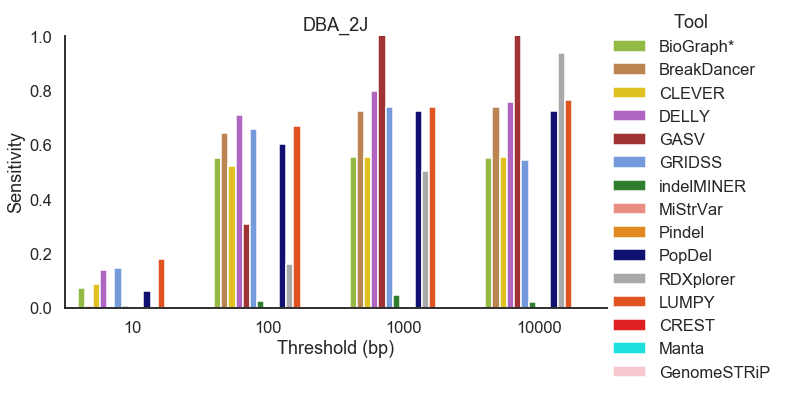

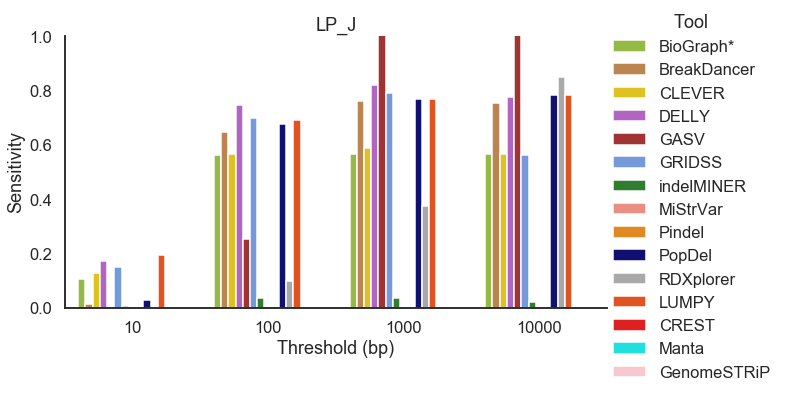

In [61]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_1000["Tool"] = df_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_1000.loc[df_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_th_1000_"+s+".pdf")

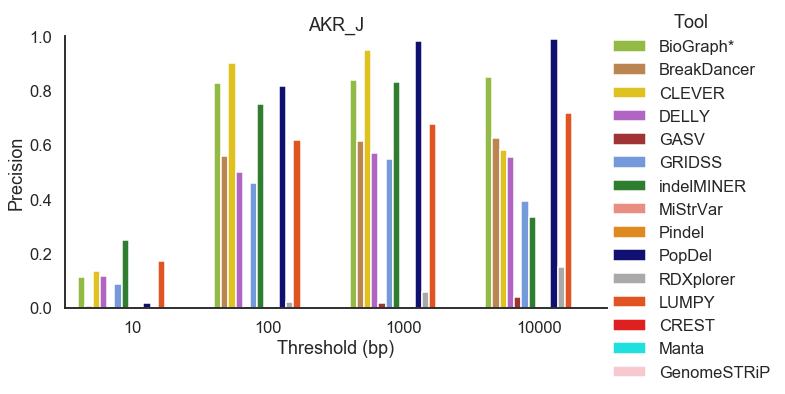

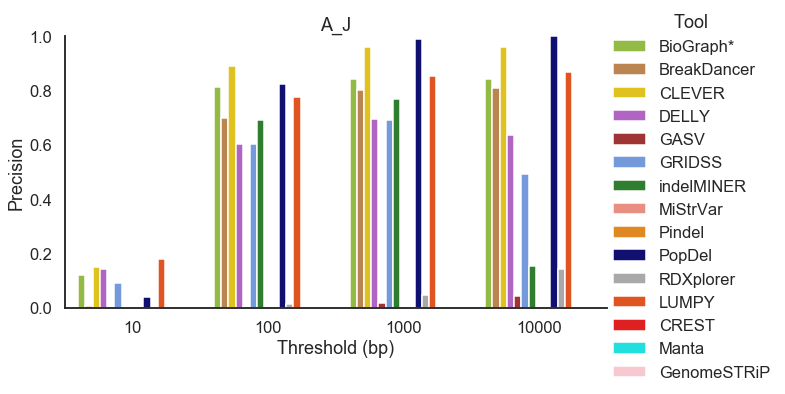

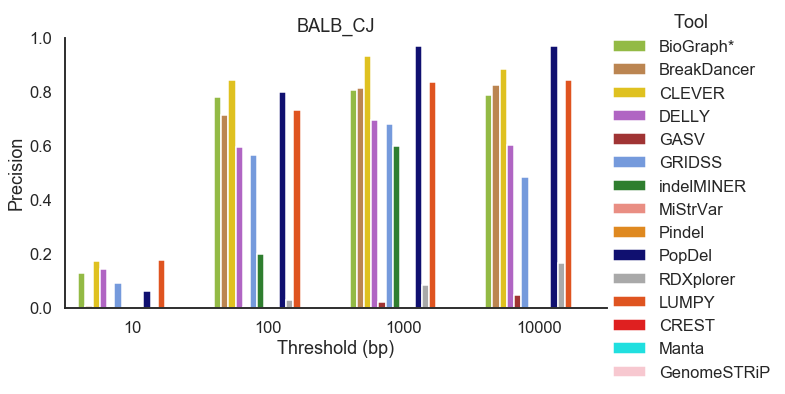

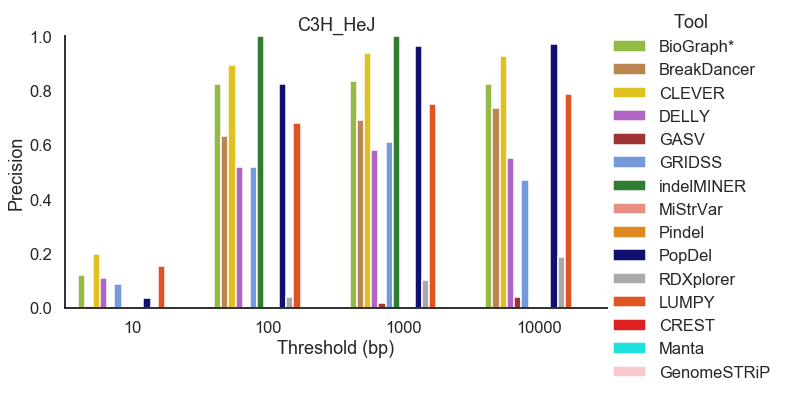

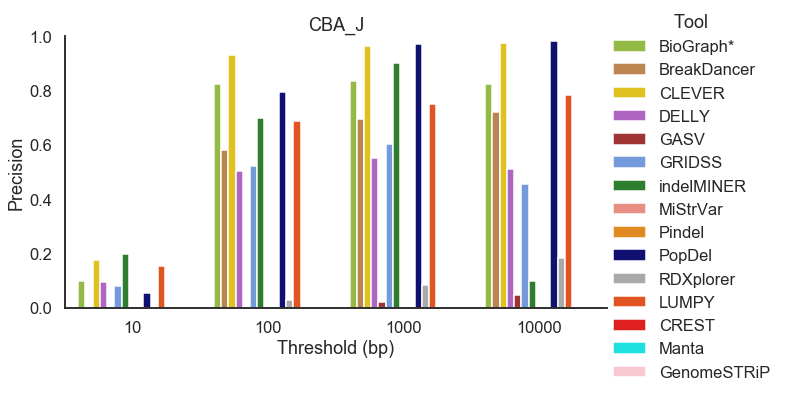

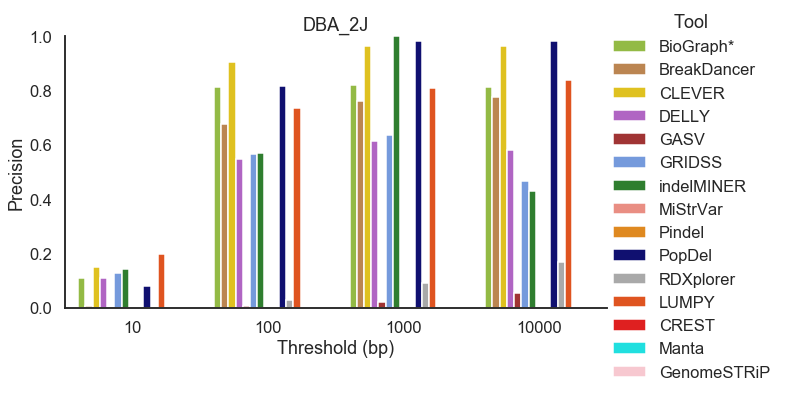

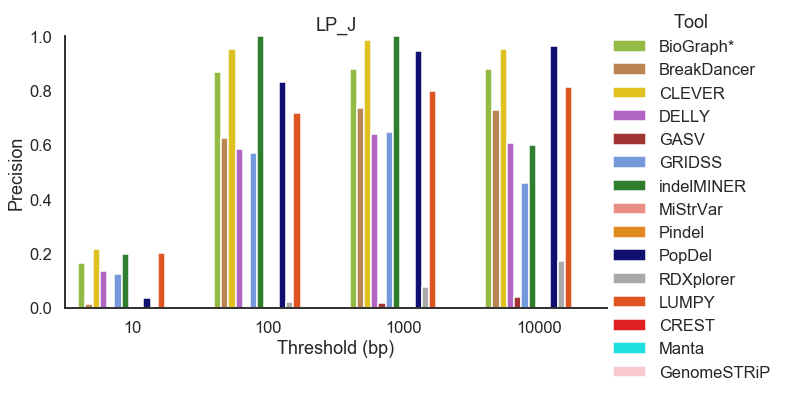

In [62]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_1000["Tool"] = df_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="precision", kind="bar",data = df_1000.loc[df_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_th_1000_"+s+".pdf")

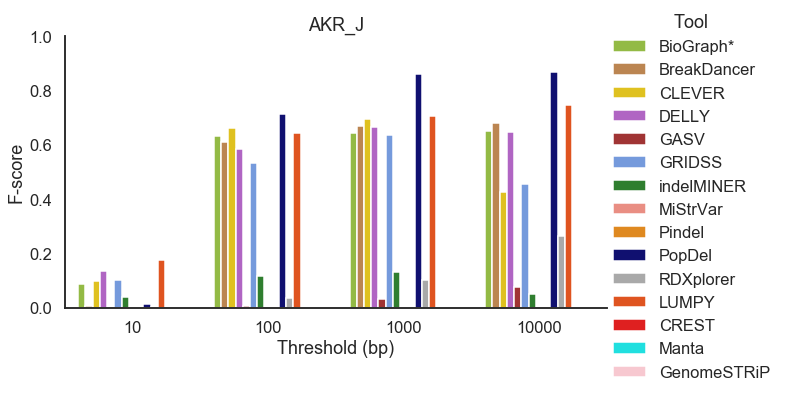

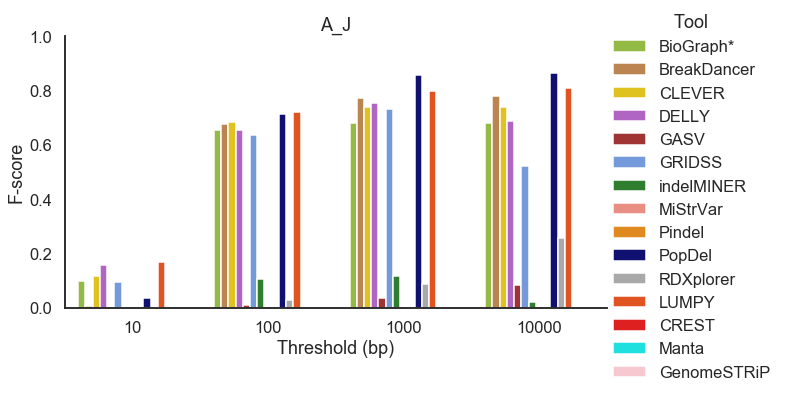

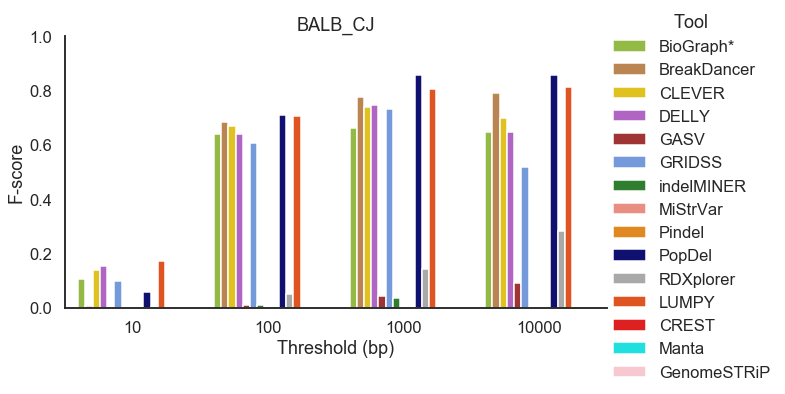

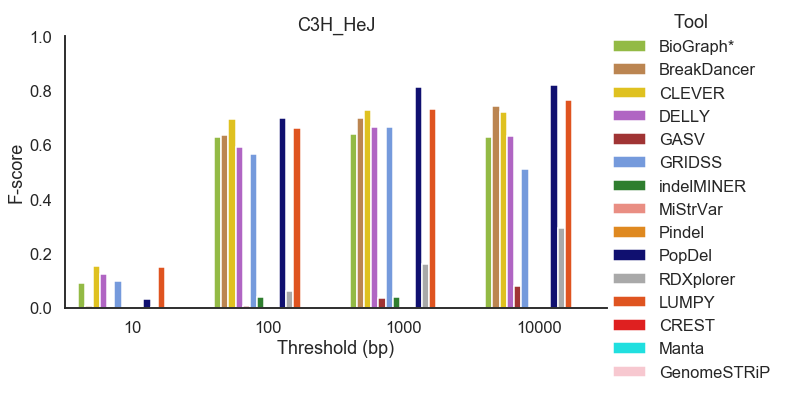

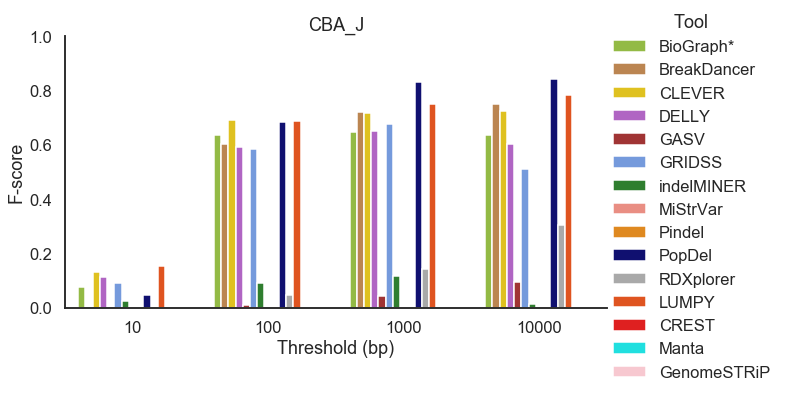

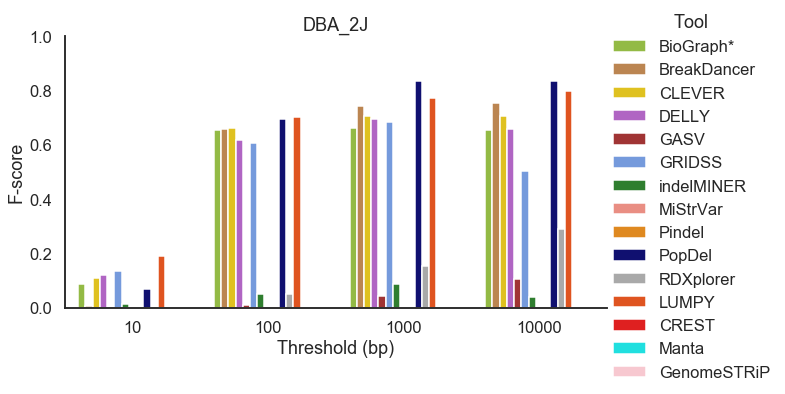

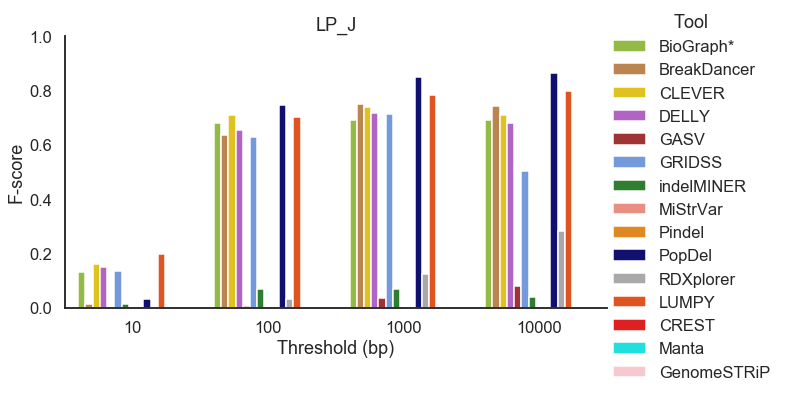

In [63]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','mistrvar','pindel','popdel','rdxplorer','smoove','crest','manta_candidateSV','genomestrip']
    labels =    ['BioGraph*','BreakDancer','CLEVER','DELLY','GASV','GRIDSS','indelMINER','MiStrVar','Pindel','PopDel','RDXplorer','LUMPY','CREST','Manta','GenomeSTRiP']
    df_1000["Tool"] = df_1000["tool"].map(dict(zip(fig_order, labels)))
    g = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_1000.loc[df_1000['strain'] == s],ci=None,hue='Tool',hue_order=labels,aspect=1.8,palette=color_map1)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/f-score_th_1000_"+s+".pdf")

# S11 Total TP Calls x Threshold for Each Tool

In [71]:
df_sum = pd.read_csv('../Data/analysis_files/df_sum1.csv') 
df_merge = pd.read_csv('../Data/analysis_files/df_merged.csv')

In [72]:
tools=['breakdancer',
#'clever',
'delly',
'gasv',
'gridss',
#'indelminer',
'lumpexpress',
#'mistrvar',
#'pindel',
#'platypus',
'popdel',
'smoove',
'sniffles',
'crest',
'manta_candidateSV',
'genomestrip']

In [75]:
df_merge_100=df_merge.loc[(df_merge['threshold'] ==100)]
df_sum

Unnamed: 0         tool  threshold   nTP     nFP   nFN   nTN
0            0  breakdancer          0     0    3064  3254     0
1            1  breakdancer         10    50    3014  3204    24
2            2  breakdancer        100  1600    1464  1654   795
3            3  breakdancer       1000  2065     999  1189  1194
4            4       clever          0     0   13099  3254     0
5            5       clever         10   417   12682  2837   185
6            6       clever        100  2228   10871  1026  1128
7            7       clever       1000  2566   10533   688  1379
8            8        delly          0     0    5816  3254     0
9            9        delly         10   439    5377  2815   125
10          10        delly        100  1998    3818  1256   664
11          11        delly       1000  2259    3557   995   880
12          12         gasv          0     0   71212  3254     0
13          13         gasv         10     0   71212  3254     0
14          14         gasv        100   509   70703  2745    30
15          15         gasv       1000  2026   69186  1228   257
16          16       gridss          0     0   15828  3254     0
17          17       gridss         10   401   15427  2853    43
18          18       gridss        100  2036   13792  1218   284
19          19       gridss       1000  2475   13353   779   521
20          20   indelminer          0     0   68744  3254     0
21          21   indelminer         10    78   68666  3176     3
22          22   indelminer        100   463   68281  2791     9
23          23   indelminer       1000  1106   67638  2148   106
24          24  lumpexpress          0     0    3971  3254     0
25          25  lumpexpress         10   571    3400  2683   157
26          26  lumpexpress        100  1920    2051  1334   645
27          27  lumpexpress       1000  2123    1848  1131   779
28          28     mistrvar          0     0   40637  3254     0
29          29     mistrvar         10   126   40511  3128     1
30          30     mistrvar        100   737   39900  2517    26
31          31     mistrvar       1000  1287   39350  1967   156
32          32       pindel          0     0  498298  3254     0
33          33       pindel         10   284  498014  2970     6
34          34       pindel        100  1447  496851  1807    30
35          35       pindel       1000  2377  495921   877   290
36          36       popdel          0     0    1398  3254     0
37          37       popdel         10    52    1346  3202    16
38          38       popdel        100  1098     300  2156   460
39          39       popdel       1000  1333      65  1921   600
40          40    rdxplorer          0     0   15986  3254     0
41          41    rdxplorer         10    28   15958  3226     7
42          42    rdxplorer        100   756   15230  2498   151
43          43    rdxplorer       1000  1371   14615  1883   347
44          44       smoove          0     0    2700  3254     0
45          45       smoove         10   577    2123  2677   276
46          46       smoove        100  1929     771  1325  1114
47          47       smoove       1000  2109     591  1145  1276
48          48     sniffles          0     0    1307  3254     0
49          49     sniffles         10   327     980  2927    77
50          50     sniffles        100   857     450  2397   227
51          51     sniffles       1000   903     404  2351   257
52          52    BioGraph*          0     0    2713  3254     0
53          53    BioGraph*         10   252    2461  3002    95
54          54    BioGraph*        100  1558    1155  1696   660
55          55    BioGraph*       1000  1710    1003  1544   769

In [74]:
for t in tools:

    import matplotlib.pyplot as plt
    import seaborn as sns
    
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g = sns.catplot(x="threshold", y="nTP", kind="point",data=df_sum.loc[(df_sum['tool'] ==t)],hue='cov',aspect=1.8)
    g.set(xlabel='Threshold (bp)', ylabel='Total number of TP calls')
    plt.title(t)
    g=sns.despine()
    #plt.show(g)
    plt.savefig("../Data/figures/supplementary/TP_cov_"+t+".png")
    plt.savefig("../Data/figures/supplementary/TP_cov_"+t+".pdf")

ValueError: Could not interpret input 'cov'